In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# Chatgpt vorlage 25.01 für placing-funktion:
for stellplatz in stellplaetze_sortiert:
    success = place_stellplatz(stellplatz, available_spaces)
    if not success:
        # Kann man nicht platzieren → ggf. Meldung oder Abbruch
        ...

def place_stellplatz(stellplatz, available_spaces):
    # 1) Entpacken
    breite_stell, hoehe_stell, stellplatz_typ = stellplatz
    
    # 2) Schleife über alle verfügbaren Flächen (in passender Sortierung)
    for i, rect in enumerate(available_spaces):
        x, y, w, h = rect
        
        # 2A) Passt der Stellplatz überhaupt in dieses Rechteck?
        if w >= breite_stell and h >= hoehe_stell:
            # 2B) Prüfen, ob hier bereits ein Fahrweg anliegt
            if fahrweg_vorhanden(stellplatz, rect):
                # Perfekt, wir platzieren Stellplatz ohne Extra-Fahrweg
                platzieren_und_restflaechen_aktualisieren(
                    rect_index=i,
                    stellplatz=stellplatz,
                    available_spaces=available_spaces
                )
                return True
            
            else:
                # Fahrweg nicht vorhanden: Brauche ich extra Platz?
                required_gap = get_required_gap(stellplatz_typ)  # z. B. dict { 'dsr': left_gap, ... }
                
                if genug_platz_fuer_stellplatz_und_fahrweg(stellplatz, rect, required_gap):
                    platzieren_und_restflaechen_aktualisieren_mit_fahrweg(
                        rect_index=i,
                        stellplatz=stellplatz,
                        required_gap=required_gap,
                        available_spaces=available_spaces
                    )
                    return True
                else:
                    # in dieser Fläche kann man Stellplatz + Fahrweg nicht platzieren -> nächste Fläche
                    continue
        else:
            # Stellplatz passt nicht -> nächste Fläche
            continue
    
    # Keine Fläche gepasst
    return False


def fahrweg_vorhanden(stellplatz, rect):
    # wenn block => check oben/unten, wenn dsr => check links, etc.
    # vergleiche existierende Fahrwege-Liste. 
    # return True/False

def genug_platz_fuer_stellplatz_und_fahrweg(...):
    #Prüfe, ob w >= (breite_stell + gap) und h >= hoehe_stell (oder das, was du brauchst). Bei block kann es z. B. h >= (hoehe_stell + gap) sein, je nach Logik.

def platzieren_und_restflaechen_aktualisieren(...):
    #Du legst den Stellplatz an (x,y) oder wo auch immer du dein Placement definierst (z. B. immer in der linken unteren Ecke des rect).
    #Du schneidest die belegte Fläche aus available_spaces heraus und fügst 0–4 neue Restflächen ein (typisches Guillotine Packing oder was immer du nutzt).
    #Bei Bedarf aktualisierst du fahrwege-Liste, wenn du keinen neuen brauchst – tust du nichts.

def platzieren_und_restflaechen_aktualisieren_mit_fahrweg(...):
    #Wie oben, nur dass du zusätzlich den Fahrweg in die fahrwege-Liste aufnimmst und die belegte Fläche größer ist (Stellplatz + gap).




NameError: name 'stellplaetze_sortiert' is not defined

In [ ]:
def placing_vehicles_on_parking_space_bestfit(stellplatz, available_spaces, fahrwege):
    """
    Versucht, den Stellplatz in der 'besten' (kleinsten) Parkfläche zu platzieren,
    wobei zunächst geprüft wird, ob ein Fahrweg anliegt. Falls nicht, wird geprüft,
    ob genug Platz für Stellplatz + Fahrweg vorhanden ist.
    
    Rückgabe: True, wenn platziert, sonst False
    """
    
    # 1) Stellplatz-Infos auspacken
    vehicle_type, breite_, hoehe_, isblock = stellplatz
    rect_type = 'block' if isblock else 'dsr'
    
    # Diese Variablen speichern den "besten" Index und dessen Fläche
    best_index = -1
    best_area = float('inf')  # Oder float('inf'), um die minimale Fläche zu suchen
    
    # 2) Durchlauf über alle verfügbaren Parkflächen
    for i, rect in enumerate(available_spaces):
        x, y, free_w, free_h = rect
        
        # Prüfen, ob der Stellplatz alleine hineinpasst
        if free_w >= breite_ and free_h >= hoehe_:
            # (a) Prüfen, ob ausreichend großer Fahrweg bereits existiert
            fahrweg_vorhanden = fahrweg_pruefung(stellplatz, rect, fahrwege)

            if fahrweg_vorhanden:
                # -> Diese Parkfläche wäre geeignet für eine Platzierung 
                #    ohne zusätzliche Fahrweg-Fläche
                area = free_w * free_h  # oder ein anderes "klein"-Kriterium
                if area < best_area:
                    best_area = area
                    best_index = i
            
            else:
                # (b) Falls kein ausreichender Fahrweg existiert, ist extra Fahrweg nötig
                required_gap = get_required_gap(rect_type)  
                # Prüfen, ob Stellplatz + Fahrweg dort hineinpasst
                if enough_space_for_vehicle_and_drivinglanes(stellplatz, rect, required_gap):
                    area = free_w * free_h
                    if area < best_area:
                        best_area = area
                        best_index = i
                # else: nicht passend -> wir schauen einfach die nächste Fläche an
    
    # 3) Nach dem Durchlauf: prüfen, ob wir eine passende Fläche gefunden haben
    if best_index != -1:
        # Platzierung in der besten (kleinsten) gefundenen Fläche
        place_vehicle_and_update(stellplatz, available_spaces, best_index, fahrwege)
        return True
    else:
        # Keine Fläche hat gepasst
        return False





In [2]:
# iterieren über alle Stellplätze in sortierter Reihenfolge 
for stellplatz in stellplaetze_sortiert:
    vehicle_type,breite_,hoehe_ , isblock = stellplatz
    best_fit_index = -1
    min_breite = float('inf')
    min_hoehe = float('inf')

    rect_type = 'block' if isblock else 'dsr'
    required_left_gap = conflict_matrix.get((rect_type, 'left'), 0)

    # iterieren über die verfügbaren Behälter(Rechtecke)
    for i, available in enumerate(available_spaces):
        x_,y_,frei_breite,frei_hoehe = available
                    
        #prüfen ob der ausgewählte Stellplatz in den ausgewälten Behälter passt 
        if frei_hoehe >= hoehe_  and frei_breite >= breite_ :
                if frei_hoehe < min_hoehe or (frei_hoehe == min_hoehe and frei_breite < min_breite):
                    best_fit_index = i
                    min_breite = frei_breite
                    min_hoehe = frei_hoehe
    
    '''
    # Wenn ein passender Behälter gefunden wurde, wird geprüft, ob ein Fahrweg von ausreichender Größe an ihm grenzt.
    if best_fit_index != -1:
        benoetigter_fahrweg = fahrweg_pruefung(stellplatz, available, fahrwege)

        # Für den Fall, dass bereits links von der dsr-Stellfläche ein Fahrweg existiert 
        if rect_type == 'dsr' and benoetigter_fahrweg['Fahrweg_links_anliegend'] == False:
            x_,y_,frei_breite,frei_hoehe = available_spaces[best_fit_index]
            available = available_spaces[best_fit_index]
            platzierte_stellflaechen.append((vehicle_type, x_ , y_ ,breite_ ,hoehe_ , isblock))

            # Berechnung der sich neu ergebenden freien Flächen durch die Platzierung 
            newfree_rectangles = get_newfree_rectangles(available,stellplatz)
            available_spaces.extend(newfree_rectangles)
            # Entfernen der verwendeten Fläche aus der Liste der verfügbaren Flächen im Behälter
            del available_spaces[best_fit_index] 

            # Die neue Liste der freien Flächen auf mögliche Zusammenführung von benachbarten Flächen prüfen
            available_spaces = merge_rectangles_in_available_spaces(available_spaces)

            # sortiert die freien Flächen primär nach Höhe(Y) und sekundär nach Breite(X) nach Patrik Mundt    
            available_spaces = sorted(available_spaces, key= lambda s: (s[3], s[2])) 
            break # richtige Stelle?
        # Für den Fall, das ein zusätzlicher Fahrweg links von der dsr-Stellfläche hinzugefügt werden muss
        elif rect_type == 'dsr' and benoetigter_fahrweg['Fahrweg_links_anliegend'] == True:
            # Prüfung ob ausgewählter Behälter noch immer großgenug für Stellplatz inklusive Fahrweg ist
            x_,y_,frei_breite,frei_hoehe = available_spaces[best_fit_index]
            
            if frei_hoehe >= hoehe_  and frei_breite >= breite_ + required_left_gap:
                if frei_hoehe < min_hoehe or (frei_hoehe == min_hoehe and frei_breite < min_breite):
                    best_fit_index = i
                    min_breite = frei_breite
                    min_hoehe = frei_hoehe

    '''



        
    
    # Wenn ein passender Bereich gefunden wurde, wird der Stellplatz platziert 
    if best_fit_index != -1:

        x_,y_,frei_breite,frei_hoehe = available_spaces[best_fit_index]
        available = available_spaces[best_fit_index]
        platzierte_stellflaechen.append((vehicle_type, x_ , y_ ,breite_ ,hoehe_ , isblock))

        # Berechnung der sich neu ergebenden freien Flächen durch die Platzierung 
        newfree_rectangles = get_newfree_rectangles(available,stellplatz)
        available_spaces.extend(newfree_rectangles)

        # Entfernen der verwendeten Fläche aus der Liste der verfügbaren Flächen im Behälter
        del available_spaces[best_fit_index] 

        # Die neue Liste der freien Flächen auf mögliche Zusammenführung von benachbarten Flächen prüfen
        available_spaces = merge_rectangles_in_available_spaces(available_spaces)

        # sortiert die freien Flächen primär nach Höhe(Y) und sekundär nach Breite(X) nach Patrik Mundt    
        available_spaces = sorted(available_spaces, key= lambda s: (s[3], s[2])) 

        ax = axs[subplot_index - 1]
        ax.set_xlim(0, breite_behaelter)  # Passe container_width an
        ax.set_ylim(0, hoehe_behaelter)  # Passe container_height an
        ax.set_aspect('equal')
        ax.set_title(f"Schritt {subplot_index}")

        for i, (x,y,breite,hoehe) in enumerate(available_spaces):
            rect = patches.Rectangle((x, y), breite, hoehe, linewidth=1, edgecolor = 'green', facecolor= 'green', alpha=0.3)
            ax.add_patch(rect)
            ax.text(x + breite / 2, y + hoehe / 2, f"{i+1}", ha='center', va='center', fontsize=8, color='black')

        subplot_index += 1  


NameError: name 'stellplaetze_sortiert' is not defined

In [ ]:
def bin_packing(session,ergebnisse_gesamt,breite_behaelter=None,hoehe_behaelter=None):
    max_laenge_direct = 10 #hier als Beispiel Länge. Andere Bedingung ist max_laenge_direct<= hoehe_behälter/seitenlaenge
    standard_block_length = 6 
    innerer_rand = 8 # Breite der Fahrwege, welche am inneren Rand der Parkfläche liegen (Aus Mundts-Arbeit: 8m) 
    liste = []

    # Berechenen der Flächeninhalte aller Stellplätze 
    fleache_ohne_fahrwege = 0
    for key, value in ergebnisse_gesamt.items():
        fleache = value["Fläche"]
        fleache_ohne_fahrwege += fleache

    # Prüfen ob eine Depotparkfläche existiert 
    if breite_behaelter is not None and hoehe_behaelter is not None:   
        behaelter_flaeche = breite_behaelter*hoehe_behaelter
        if behaelter_flaeche <= fleache_ohne_fahrwege*1.1: # Flächenbedarfsprüfung für existierende Fläche (<= da mindestens 1 Fahrweg existieren wird)
            return "Die Parklächenkonfiguration hat die Flächenbedarfsprüfung nicht bestanden" 
        else:
            print("Die Parkfläche hat die Flächenbedarfsprüfung bestanden")
    else: 
        # Falls keine Vorhanden, wird hier eine quadratische Fläche erzeugt       
        breite_behaelter = math.ceil(math.sqrt(fleache_ohne_fahrwege))+100  
        hoehe_behaelter =  math.ceil(math.sqrt(fleache_ohne_fahrwege))+100 
        print("Es wurde eine ausreichend große Parkfläche erzeugt")


    for key, value in ergebnisse_gesamt.items():
        vehicle_type = value["VehicleType"]
        block_parking_slots = value["Block Parkplätze"]
        direct_parking_slots = value["Direct Parkplätze"]
        #vehicle_count = value["Fahrzeug Anzahl"]
        
        # Prüfen, ob eine ExtraLine existiert 
        extra_line_length = block_parking_slots%standard_block_length
        block_lines = block_parking_slots//standard_block_length
        if extra_line_length > 0:
            block_lines += 1
            
        x = session.query(VehicleType.length).filter(VehicleType.id == vehicle_type.id).scalar() #länge
        z = session.query(VehicleType.width).filter(VehicleType.id==vehicle_type.id).scalar() #breite 

        block_hohe = standard_block_length*x
        block_breite = block_lines*z
        flaeche_block = (vehicle_type, block_hohe*block_breite)
        is_block = True 
        block_stellplaetze = (vehicle_type,block_breite,block_hohe,is_block)

        # Falls eine Extraline existiert verringert sich der Flächeninhalt 
        if extra_line_length > 0:                                  
            verlust = standard_block_length - extra_line_length
            verlust_flaeche = verlust*(x*z)
            flaeche_block = (flaeche_block[0],  (block_hohe*block_breite) - verlust_flaeche)
    
        direct_stellplaetze = None 
        if direct_parking_slots > 0:
            breite = x*math.sin(math.radians(45))+z*math.sin(math.radians(45))
            laenge = x*math.sin(math.radians(45))+z*math.sin(math.radians(45)) + (direct_parking_slots-1) * z/math.cos(math.radians(45))

            direct_flaeche = (vehicle_type,breite*laenge)
            direct_stellplaetze = (vehicle_type,breite,laenge, not is_block)
        
        # Wenn Direct-Parkplätze existieren, werden diese zur Liste der zu plazierenden Stellplätze hinzugefügt 
        if direct_stellplaetze: 
            liste.extend([block_stellplaetze,direct_stellplaetze])
        else:
            liste.append(block_stellplaetze)
    
    # decreasing sortieren der Stellflächen, primär nach x und sekundär nach y 
    stellplaetze_sortiert = sorted(liste, key = lambda r: (-r[1],-r[2])) 

    # Verfügbarer Platz im Behälter unter Berücksichtigung der Fahrbahn am innen Rand der Parkfläche
    available_spaces = [(0,0,breite_behaelter,hoehe_behaelter)]
    platzierte_stellflaechen = []
    fahrwege = []

    # Fahrweg am innereren Rand der Parkfläche  
    linker_rand = (0,0,innerer_rand,hoehe_behaelter)
    oberer_rand = (0,hoehe_behaelter- innerer_rand,breite_behaelter,innerer_rand)
    rechter_rand = (breite_behaelter-innerer_rand,0,innerer_rand,hoehe_behaelter)
    unterer_rand = (0,0,breite_behaelter,innerer_rand)

    blocked_spaces = [linker_rand,oberer_rand,rechter_rand,unterer_rand]
    fahrwege.extend(blocked_spaces)
    
   
    # Konflikt-Matrix implementieren
    conflict_matrix = create_conflict_matrix()

    for stellplatz in stellplaetze_sortiert:
        vehicle_type,breite_,hoehe_ , isblock = stellplatz
        best_fit_index = -1
        min_breite = float('inf')
        min_hoehe = float('inf')

        
        rect_type = 'block' if isblock else 'dsr'

        for i, available in enumerate(available_spaces):
            x_,y_,frei_breite,frei_hoehe = available

            # Überprüfung von Überlappungen zwischen freien und blockierten Flächen
            if any(rectangles_overlap(x_, y_, frei_breite, frei_hoehe, bx, by, bbreite, bhoehe) for bx, by, bbreite, bhoehe in blocked_spaces):
                continue 
                        
            # mindest Abstände zu anderen Stellplätzen bzw. Fahrwege für jeweiligen Stellflächentyp ermitteln     
            required_top_gap = conflict_matrix.get((rect_type, 'top'), 0)
            required_bottom_gap = conflict_matrix.get((rect_type, 'bottom'), 0)
            required_left_gap = conflict_matrix.get((rect_type, 'left'), 0)
            required_right_gap = conflict_matrix.get((rect_type, 'right'), 0)

         
            for fahrweg in fahrwege:
                fx , fy , fbreite , fhoehe = fahrweg 

                if rect_type == 'dsr':    
                    if fx == x_+required_left_gap and fy <= y_ + hoehe_ and fy + fhoehe >= y_:  # Fahrweg ist in y-Richtung groß genug
                        if required_left_gap > 0:  
                            required_left_gap = 0  
                    if fx == x_ + breite_ and fy <= y_ + hoehe_ and fy + fhoehe >= y_: # Fahrweg ist in y-Richtung groß genug (rechte Fahrbahn)
                        if required_right_gap > 0:  
                            required_right_gap = 0  
                   
  

            #prüfen ob der ausgewählte Stellplatz in den ausgewälten Behälter passt 
            if frei_hoehe >= hoehe_ + required_top_gap + required_bottom_gap and \
                frei_breite >= breite_ + required_left_gap + required_right_gap:
                    if frei_hoehe < min_hoehe or (frei_hoehe == min_hoehe and frei_breite < min_breite):
                        best_fit_index = i
                        min_breite = frei_breite
                        min_hoehe = frei_hoehe
        
        # Wenn ein passender Bereich gefunden wurde, wird der Stellplatz platziert 
        if best_fit_index != -1:
            x_,y_,frei_breite,frei_hoehe = available_spaces[best_fit_index]
            platzierte_stellflaechen.append((vehicle_type, x_ + required_left_gap, y_+required_bottom_gap ,breite_,hoehe_ , isblock))

            new_blocked_space = (x_ + required_left_gap, y_+required_bottom_gap ,breite_,hoehe_)
            blocked_spaces.append(new_blocked_space)
            
            if required_top_gap > 0:
                new_fahrweg = (x_ , y_ + hoehe_ + required_bottom_gap, breite_ , required_top_gap)
                fahrwege.append(new_fahrweg)
                blocked_spaces.append(new_fahrweg)

            if required_bottom_gap > 0:
                new_fahrweg = (x_ , y_ , breite_ , required_bottom_gap )
                fahrwege.append(new_fahrweg)
                blocked_spaces.append(new_fahrweg)

            if required_right_gap > 0:
                new_fahrweg = (x_ + breite_ , y_ , required_right_gap, hoehe_)
                fahrwege.append(new_fahrweg)
                blocked_spaces.append(new_fahrweg)

            if required_left_gap > 0:
                new_fahrweg = (x_ , y_ , required_left_gap, hoehe_)
                fahrwege.append(new_fahrweg)
                blocked_spaces.append(new_fahrweg)
            

            del available_spaces[best_fit_index] # Entfernen der verwendeten Fläche aus der Liste der verfügbaren Flächen im Behälter

            min_space_breite = 15 # mindest Breite für freie Bereiche 
            min_space_hoehe = 15  # mindest Höhe für freie Bereiche 

            # Neue freie Bereiche innerhalb des Behälters erzeugen 
            '''
            if frei_breite > breite_: # Falls die freie Fläche breiter als die platzierte Stellfläche war, bleibt rechts der Stellfläche freier Platz im Behälter 
                available_spaces.append((x_ + breite_ , y_ , frei_breite - breite_ ,frei_hoehe)) # Dieser freie Platz wird der Liste der available_spaces hinzugefügt 

            if frei_hoehe > hoehe_: # Falls die freie Fläche höher als die platzierte Stellfläche war, bleibt (unter) der Stellfläche freier Platz im Behälter 
                available_spaces.append((x_ , y_ + hoehe_ , frei_breite , frei_hoehe - hoehe_)) # Dieser freie Platz wird der Liste der available_spaces hinzugefügt 

            if frei_breite > breite_ and frei_hoehe > hoehe_: # Wenn Platz sowohl rechts als auch unten übrig bleibt, wird in der rechten unteren Ecke ein zusätzlicher freier Bereich angelegt.
                available_spaces.append((x_ + breite_, y_ + hoehe_, frei_breite - breite_ , frei_hoehe - hoehe_ ))
            '''
            if frei_breite - breite_ > min_space_breite:
                available_spaces.append((x_ + breite_, y_, frei_breite - breite_, frei_hoehe))

            if frei_hoehe - hoehe_ > min_space_hoehe:
                available_spaces.append((x_, y_ + hoehe_, frei_breite, frei_hoehe - hoehe_))

            # sortiert die freien Flächen primär nach Höhe(Y) und sekundär nach Breite(X) nach Patrik Mundt    
            available_spaces = sorted(available_spaces, key= lambda s: (s[3], s[2])) 
            # Benachbarte oder überlappende Freiebereiche werden zusammengefasst 
            available_spaces = merge_overlapping_spaces(available_spaces)

    
    
    fehlende_stellflaechen = [s for s in stellplaetze_sortiert if (s[1],s[2]) not in [(p[3],p[4]) for p in platzierte_stellflaechen]]
    if fehlende_stellflaechen:
        raise ValueError(f"Die folgenden Stellplätze konnten nicht platziert werden: {fehlende_stellflaechen}")
    
  
    return platzierte_stellflaechen, fahrwege, breite_behaelter, hoehe_behaelter


In [ ]:
def bin_packing(session, ergebnisse_gesamt, breite_behaelter=None, hoehe_behaelter=None):
    max_laenge_direct = 10  # hier als Beispiel Länge. Andere Bedingung ist max_laenge_direct <= hoehe_behaelter / seitenlaenge
    standard_block_length = 6
    liste = []
    # Berechnen der Flächeninhalte aller Rectangles
    fleache_ohne_fahrwege = 0
    for key, value in ergebnisse_gesamt.items():
        fleache = value["Fläche"]
        fleache_ohne_fahrwege += fleache

    if breite_behaelter is not None and hoehe_behaelter is not None:  # Prüfen, ob eine Depotparkfläche existiert
        behaelter_flaeche = breite_behaelter * hoehe_behaelter
        if behaelter_flaeche <= fleache_ohne_fahrwege * 1.1:  # plus Sicherheits-Menge von 10%  # Flächenbedarfsprüfung für existierende Fläche (<= da mindestens 1 Fahrweg existieren wird)
            return "Die Parklächenkonfiguration hat die Flächenbedarfsprüfung nicht bestanden"
        else:
            print("Die Parkfläche hat die Flächenbedarfsprüfung bestanden")
    else:
        breite_behaelter = math.ceil(math.sqrt(fleache_ohne_fahrwege)) + 100  # +10 Platzhalter für Fahrwege
        hoehe_behaelter = math.ceil(math.sqrt(fleache_ohne_fahrwege)) + 100  # Falls keine Vorhanden, wird hier eine quadratische Fläche erzeugt

    for key, value in ergebnisse_gesamt.items():
        vehicle_type = value["VehicleType"]
        block_parking_slots = value["Block Parkplätze"]
        direct_parking_slots = value["Direct Parkplätze"]
        
        extra_line_length = block_parking_slots % standard_block_length  # Prüfen, ob eine ExtraLine existiert
        block_lines = block_parking_slots // standard_block_length
        if extra_line_length > 0:
            block_lines += 1

        x = session.query(VehicleType.length).filter(VehicleType.id == vehicle_type.id).scalar()  # länge
        z = session.query(VehicleType.width).filter(VehicleType.id == vehicle_type.id).scalar()  # breite

        block_hohe = standard_block_length * x
        block_breite = block_lines * z
        is_block = True
        block_stellplaetze = (vehicle_type, block_breite, block_hohe, is_block)

        direct_stellplaetze = None
        if direct_parking_slots > 0:
            breite = x * math.sin(math.radians(45)) + z * math.sin(math.radians(45))
            laenge = x * math.sin(math.radians(45)) + z * math.sin(math.radians(45)) + (direct_parking_slots - 1) * z / math.cos(math.radians(45))

            direct_stellplaetze = (vehicle_type, breite, laenge, not is_block)

        if direct_stellplaetze:  # Wenn Direct-Parkplätze existieren, werden diese zur Liste der zu platzierenden Stellplätze hinzugefügt
            liste.extend([block_stellplaetze, direct_stellplaetze])
        else:
            liste.append(block_stellplaetze)

    stellplaetze_sortiert = sorted(liste, key=lambda r: (-r[1], -r[2]))  # Sortieren der Stellflächen, primär nach Breite (x) und sekundär nach Höhe (y)

    # Verfügbarer Platz im Behälter unter Berücksichtigung der blockierten Randbereiche
    innerer_rand = 8  # aus Mundts Arbeit
    available_spaces = [
        (innerer_rand, innerer_rand, breite_behaelter - 2 * innerer_rand, hoehe_behaelter - 2 * innerer_rand)
    ]

    platzierte_stellflaechen = []
    fahrwege = []

    # Konflikt-Matrix implementieren
    conflict_matrix = create_conflict_matrix()

    for stellplatz in stellplaetze_sortiert:
        vehicle_type, breite_, hoehe_, isblock = stellplatz
        best_fit_index = -1
        min_breite = float('inf')
        min_hoehe = float('inf')

        rect_type = 'block' if isblock else 'dsr'

        for i, available in enumerate(available_spaces):
            x_, y_, frei_breite, frei_hoehe = available

            # Mindestabstände zu anderen Stellplätzen bzw. Fahrwege für jeweiligen Stellflächentyp ermitteln
            required_top_gap = conflict_matrix.get((rect_type, 'top'), 0)
            required_bottom_gap = conflict_matrix.get((rect_type, 'bottom'), 0)
            required_left_gap = conflict_matrix.get((rect_type, 'left'), 0)
            required_right_gap = conflict_matrix.get((rect_type, 'right'), 0)

            # Prüfen, ob der ausgewählte Stellplatz in den verfügbaren Behälter passt (inklusive der Mindestabstände)
            if frei_hoehe >= hoehe_ + required_top_gap + required_bottom_gap and \
               frei_breite >= breite_ + required_left_gap + required_right_gap:
                if frei_hoehe < min_hoehe or (frei_hoehe == min_hoehe and frei_breite < min_breite):
                    best_fit_index = i
                    min_breite = frei_breite
                    min_hoehe = frei_hoehe

        # Wenn ein passender Bereich gefunden wurde, wird der Stellplatz platziert
        if best_fit_index != -1:
            x_, y_, frei_breite, frei_hoehe = available_spaces[best_fit_index]

            # Prüfen, ob der Platz nicht im Randfahrweg liegt, außer wenn es sich um einen Fahrweg handelt, der den Randfahrweg überlappen darf
            if (isblock or
                (x_ >= innerer_rand and y_ >= innerer_rand and
                 x_ + breite_ <= breite_behaelter - innerer_rand and
                 y_ + hoehe_ <= hoehe_behaelter - innerer_rand)):

                platzierte_stellflaechen.append((vehicle_type, x_ + required_left_gap, y_ + required_bottom_gap, breite_, hoehe_, isblock))

                # Hinzufügen der Fahrwege, aber ohne den Bereich als blockiert zu betrachten
                if required_top_gap > 0:
                    fahrwege.append((x_, y_ + hoehe_ + required_bottom_gap, breite_, required_top_gap))
                if required_bottom_gap > 0:
                    fahrwege.append((x_, y_, breite_, required_bottom_gap))
                if required_right_gap > 0:
                    fahrwege.append((x_ + breite_, y_, required_right_gap, hoehe_))
                if required_left_gap > 0:
                    fahrwege.append((x_, y_, required_left_gap, hoehe_))

                # Entfernen der verwendeten Fläche aus der Liste der verfügbaren Flächen im Behälter
                del available_spaces[best_fit_index]

                min_space_breite = 15  # Mindestbreite für freie Bereiche
                min_space_hoehe = 15  # Mindesthöhe für freie Bereiche

                # Neue freie Bereiche innerhalb des Behälters erzeugen
                if frei_breite - breite_ > min_space_breite:
                    available_spaces.append((x_ + breite_, y_, frei_breite - breite_, frei_hoehe))

                if frei_hoehe - hoehe_ > min_space_hoehe:
                    available_spaces.append((x_, y_ + hoehe_, frei_breite, frei_hoehe - hoehe_))

                # Sortiere die freien Flächen und verschmelze benachbarte/überlappende Bereiche
                available_spaces = sorted(available_spaces, key=lambda s: (s[3], s[2]))
                available_spaces = merge_overlapping_spaces(available_spaces)

    # Definieren der Fahrwege am inneren Rand der Parkfläche als blockiert für Stellflächen, jedoch nicht für Fahrwege
    fahrwege.append((0, 0, innerer_rand, hoehe_behaelter))  # linker Rand
    fahrwege.append((0, hoehe_behaelter - innerer_rand, breite_behaelter, innerer_rand))  # oberer Rand
    fahrwege.append((breite_behaelter - innerer_rand, 0, innerer_rand, hoehe_behaelter))  # rechter Rand
    fahrwege.append((0, 0, breite_behaelter, innerer_rand))  # unterer Rand

    # Überprüfung, ob alle Stellplätze erfolgreich platziert wurden
    fehlende_stellflaechen = [
        s for s in stellplaetze_sortiert if (s[1], s[2]) not in [(p[3], p[4]) for p in platzierte_stellflaechen]
    ]
    if fehlende_stellflaechen:
        raise ValueError(f"Die folgenden Stellplätze konnten nicht platziert werden: {fehlende_stellflaechen}")

    return platzierte_stellflaechen, fahrwege, breite_behaelter, hoehe_behaelter


In [2]:
def best_fit_decreasing_placement(rectangles, container_width, container_height):
    """
    Best-Fit-Decreasing (BFD) Algorithmus zur Platzierung von Rechtecken in einem Container.

    Parameter:
    rectangles (list of tuples): Liste der zu platzierenden Rechtecke, wobei jedes Rechteck durch (width, height) dargestellt wird.
    container_width (float): Breite des Containers B.
    container_height (float): Höhe des Containers B.

    Rückgabe:
    list of tuples: Liste der platzierten Rechtecke mit deren Koordinaten (x, y, width, height).
    """
    # Sortiere die Rechtecke absteigend nach Breite und dann nach Höhe (Decreasing-Eigenschaft)
    rectangles_sorted = sorted(rectangles, key=lambda r: (-r[0], -r[1]))
    
    # Initialisiere die Liste der verfügbaren freien Bereiche im Container
    available_spaces = [(0, 0, container_width, container_height)]

    # Initialisiere die Liste der platzierten Rechtecke
    placements = []

    # Platziere jedes Rechteck in den am besten passenden verfügbaren Bereich
    for rect in rectangles_sorted:
        rect_width, rect_height = rect
        best_fit_index = -1
        min_height = float('inf')
        min_width = float('inf')
        
        # Finde den bestmöglichen verfügbaren Bereich, der das Rechteck aufnehmen kann
        for i, space in enumerate(available_spaces):
            x, y, space_width, space_height = space
            if space_width >= rect_width and space_height >= rect_height:
                if space_height < min_height or (space_height == min_height and space_width < min_width):
                    best_fit_index = i
                    min_height = space_height
                    min_width = space_width
        
        # Wenn ein passender Bereich gefunden wurde, platziere das Rechteck
        if best_fit_index != -1:
            x, y, space_width, space_height = available_spaces[best_fit_index]
            placements.append((x, y, rect_width, rect_height))
            
            # Aktualisiere die verfügbaren Bereiche nach der Platzierung
            del available_spaces[best_fit_index]
            
            # Erstelle neue verfügbare Bereiche basierend auf dem verbleibenden Platz
            if space_width > rect_width:
                available_spaces.append((x + rect_width, y, space_width - rect_width, rect_height))
            if space_height > rect_height:
                available_spaces.append((x, y + rect_height, space_width, space_height - rect_height))
            if space_width > rect_width and space_height > rect_height:
                available_spaces.append((x + rect_width, y + rect_height, space_width - rect_width, space_height - rect_height))

            # Sortiere die verfügbaren Bereiche nach Höhe und dann nach Breite, um den kleinsten verfügbaren Bereich zu finden
            available_spaces = sorted(available_spaces, key=lambda s: (s[3], s[2]))

    return placements


In [ ]:
def visualize_placements(placements, container_width, container_height):
    """
    Visualisiere die Platzierungen der Rechtecke in einem Container.

    Parameter:
    placements (list of tuples): Liste der platzierten Rechtecke mit deren Koordinaten (x, y, width, height).
    container_width (float): Breite des Containers.
    container_height (float): Höhe des Containers.
    """
    # Erstelle eine Figur und eine Achse
    fig, ax = plt.subplots()
    ax.set_xlim(0, container_width)
    ax.set_ylim(0, container_height)
    ax.set_aspect('equal')
    ax.set_title("Visualisierung der Depotauslegung")
    ax.set_xlabel("Breite")
    ax.set_ylabel("Höhe")
    
    # Zeichne den Container
    container = patches.Rectangle((0, 0), container_width, container_height, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(container)

    # Zeichne jedes platzierte Rechteck
    for i, (x, y, width, height) in enumerate(placements):
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='blue', facecolor='skyblue', alpha=0.5)
        ax.add_patch(rect)
        # Text zum Rechteck hinzufügen
        ax.text(x + width / 2, y + height / 2, f"{i+1}", ha='center', va='center', fontsize=8, color='black')

    # Achsenbeschriftung und Anzeige der Visualisierung
    plt.gca().invert_yaxis()  # Um die Darstellung von unten links zu beginnen (wie üblich in 2D-Grafiken)
    plt.grid(visible=True, linestyle='--', linewidth=0.5)
    plt.show()


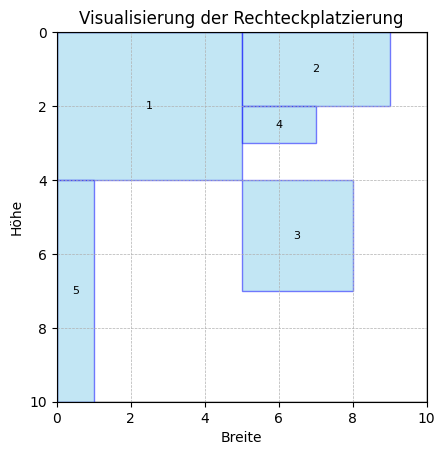

In [4]:
# Beispielaufruf des Algorithmus und Visualisierung
rectangles = [(4, 2), (3, 3), (1, 6), (2, 1), (5, 4)]
container_width = 10
container_height = 10
placements = best_fit_decreasing_placement(rectangles, container_width, container_height)

# Visualisierung der Platzierungen
visualize_placements(placements, container_width, container_height)

In [12]:
standard_block_length = 6 
max_Busse_in_Block = 30

max_line_count = int(max_Busse_in_Block/standard_block_length)
extra_line_length = 0

if max_Busse_in_Block % standard_block_length not in (1, 0):
    max_line_count += 1
    extra_line_length = max_Busse_in_Block%standard_block_length
    extra_line = True
else:
    extra_line = False
    max_line_count = max_line_count

print(max_line_count)
print(extra_line_length)
print(extra_line)

fuenf = max_line_count

i = 5
cur_direct_peak = 2
extra_line = True
extra_line_length = 3
max_line_count = 5

def flaechen_bedarf(i,cur_direct_peak,extra_line,extra_line_length,max_line_count):
    flaeche = 0
    direct_parking_slots = 0

    if i == max_line_count and extra_line:
        flaeche += (i-1)*6*30 
        flaeche += extra_line_length*30
        block_parking_slots = (i-1)*6 + extra_line_length
    else:
        flaeche += (i*6)*30
        block_parking_slots = i*6

    if cur_direct_peak < 3:
        if cur_direct_peak == 2:
            flaeche += 140.5 #Fläche für 2 Dircet-Parkplätze
            direct_parking_slots = 2
        elif cur_direct_peak ==1:
            flaeche += 104.387 #Fläche für 1 Direct-Parkplatz
            direct_parking_slots = 1
        elif cur_direct_peak == 0:
            flaeche += 0
            direct_parking_slots = 0
    else: 
        flaeche += (cur_direct_peak-2)*6.246+81.36   
        direct_parking_slots = cur_direct_peak

    return flaeche, block_parking_slots,direct_parking_slots

flaeche, block_parking_slots,direct_parking_slots =flaechen_bedarf(i,cur_direct_peak,extra_line,extra_line_length,max_line_count)

print(flaeche,block_parking_slots,direct_parking_slots)

5
0
False
950.5 27 2


In [7]:
def give_back_peak_usage_direct_for_multiple_types(session, vehicle_types, scenario):
    """
    Diese Funktion berechnet die maximale Auslastung der Direct-Parkplätze
    für mehrere VehicleTypes in einer Session.
    
    :param session: Aktuelle Datenbank-Session.
    :param vehicle_types: Liste der Fahrzeugtypen (VehicleType) in der Session.
    :param scenario: Das Szenario, für das die Berechnungen durchgeführt werden.
    
    :return: Ein Dictionary mit der maximalen Auslastung für jeden Fahrzeugtyp.
    """
    
    peak_usage_by_vehicle_type = {}
    
    for vehicle_type in vehicle_types:
        # Lade die entsprechende Charging-Area für den Fahrzeugtyp
        charging_area = session.query(Area).filter(
            Area.scenario_id == scenario.id,
            Area.vehicle_type_id == vehicle_type.id,
            Area.area_type == AreaType.DIRECT_ONESIDE
        ).first()
        
        if not charging_area:
            print(f"Keine Ladefläche für Fahrzeugtyp {vehicle_type.name} gefunden.")
            continue

        # Step 1: Erfasse die Zeiten für die Ladeereignisse
        start_time = session.query(func.min(Event.time_start)).filter(
            Event.scenario_id == scenario.id,
            Event.area_id == charging_area.id,
            Event.event_type == EventType.CHARGING_DEPOT
        ).scalar()

        end_time = session.query(func.max(Event.time_end)).filter(
            Event.scenario_id == scenario.id,
            Event.area_id == charging_area.id,
            Event.event_type == EventType.CHARGING_DEPOT
        ).scalar()

        # Fallback, falls keine Ladeereignisse gefunden wurden
        if not start_time or not end_time:
            print(f"Keine Lade-Events für Fahrzeugtyp {vehicle_type.name} gefunden.")
            cur_direct_peak = 0
        else:
            cur_direct_peak = 0
            current_time = start_time
            time_period = timedelta(minutes=1)

            # Durchlaufe die Zeit und berechne die Anzahl der belegten Ladeflächen
            while current_time <= end_time:
                count = session.query(Event).filter(
                    Event.scenario_id == scenario.id,
                    Event.area_id == charging_area.id,
                    Event.event_type == EventType.CHARGING_DEPOT,
                    Event.time_start <= current_time,
                    Event.time_end > current_time
                ).count()

                cur_direct_peak = max(cur_direct_peak, count)
                current_time += time_period

        # Speichere die maximale Auslastung für den Fahrzeugtyp
        peak_usage_by_vehicle_type[vehicle_type.name] = cur_direct_peak
    
    return peak_usage_by_vehicle_type


normal
normal
normal
normal
letzte Iteration
5


In [14]:
import math
peak_count = 50
max_block_busse = math.floor((((peak_count-2)*6.246 + 81.36)/30) + peak_count)
print(f"{max_block_busse} Line-Parkplätze sind gerde noch kleienr als {peak_count} Direct-Parkplätze")

62 Line-Parkplätze sind gerde noch kleienr als 50 Direct-Parkplätze


In [15]:
x = 
z = 2.5

peak_count = 50
breite = x*math.sin(math.radians(45))+z*math.sin(math.radians(45))
laenge = x*math.sin(math.radians(45))+z*math.sin(math.radians(45)) + (peak_count-1) * z/math.cos(math.radians(45)) 
max_block_busse = math.floor((breite*laenge)/(x*z))
print(f"{max_block_busse} Line-Parkplätze sind gerde noch kleienr als {peak_count} Direct-Parkplätze")

60 Line-Parkplätze sind gerde noch kleienr als 50 Direct-Parkplätze


In [16]:
x = 12
z = 2.5

peak_count = 50
breite = x*math.sin(math.radians(45))+z*math.sin(math.radians(45))
laenge = x*math.sin(math.radians(45))+z*math.sin(math.radians(45)) + (peak_count-1) * z/math.cos(math.radians(45)) 
max_block_busse = math.floor((breite*laenge)/(x*z))
print(f"{max_block_busse} Line-Parkplätze sind gerde noch kleienr als {peak_count} Direct-Parkplätze")

62 Line-Parkplätze sind gerde noch kleienr als 50 Direct-Parkplätze


In [32]:
def anzahl_an_line_parkplaetzen(peak_count):
    '''
    x = session.query(VehicleType.length).filter(VehicleType.id == vehicle_type.id).scalar() #length 
    z = session.query(VehicleType.width).filter(VehicleType.id==vehicle_type.id).scalar() #width
    '''
    standard_block_length = 6
    x = 14
    z = 2.5
    if x is not None and z is not None:
            
        breite = x*math.sin(math.radians(45))+z*math.sin(math.radians(45))
        laenge = x*math.sin(math.radians(45))+z*math.sin(math.radians(45)) + (peak_count-1) * z/math.cos(math.radians(45)) 
        max_block_busse = math.floor((breite*laenge)/(x*z))

        #Wie viele 6er Reihen sind mit den Bussen in Blockabstellung möglich?
        max_line_count = int(max_block_busse/standard_block_length)

        #Wird eine zusätzliche Blockreihe benötigt?
        extra_line_length = 0
        if max_block_busse % standard_block_length not in (1, 0):
            max_line_count += 1
            extra_line_length = max_block_busse%standard_block_length
            extra_line = True
            print(f"Es wird {max_line_count} Iterationen geben. Davon ist eine, eine Extra-Line mit der Cpacity von {extra_line_length} Parkplätzen")
        else:
            extra_line = False
            max_line_count = max_line_count
            print(f"Es wird {max_line_count} Iterationen geben")

        return max_block_busse,max_line_count,extra_line,extra_line_length
    else:
        print(f"Keine Länge oder Breite für VehicleType gefunden")
        return None
    
max_block_busse,max_line_count,extra_line,extra_line_length = anzahl_an_line_parkplaetzen(18)
print(extra_line)
print(extra_line_length)
print(max_block_busse)

Es wird 4 Iterationen geben. Davon ist eine, eine Extra-Line mit der Cpacity von 5 Parkplätzen
Es wird 4 Iterationen geben
True
5
23


In [45]:
# Funktion zur Bestimmung der benötigten Fläche für die Iteration i
# Aktuell nur für einen Fahrzeugtypen --> Anpassung folgt 
i = 2
cur_direct_peak = 2
extra_line = False
extra_line_length = 0
max_line_count = 2
standard_block_length = 6

def flaechen_bedarf(i,cur_direct_peak,extra_line,extra_line_length,max_line_count,standard_block_length):
    #x = session.query(VehicleType.length).filter(VehicleType.id == vehicle_type.id).scalar() #length 
    #z = session.query(VehicleType.width).filter(VehicleType.id==vehicle_type.id).scalar() #width
    x = 12
    z = 2.5

    flaeche = 0
    block_parking_slots = 0
    direct_parking_slots = 0
    simulation_with_extra_line = False

    if i == max_line_count and extra_line:
        flaeche += (i-1)*standard_block_length*(x*z)
        flaeche += extra_line_length*(x*z)
        block_parking_slots = (i-1)*standard_block_length + extra_line_length
        simulation_with_extra_line = True 
    else:
        flaeche += (i*standard_block_length)*(x*z)
        block_parking_slots = i*standard_block_length

    
    if cur_direct_peak > 0:
        breite = x*math.sin(math.radians(45))+z*math.sin(math.radians(45))
        laenge = x*math.sin(math.radians(45))+z*math.sin(math.radians(45)) + (cur_direct_peak-1) * z/math.cos(math.radians(45))

        flaeche += breite*laenge  
        direct_parking_slots = cur_direct_peak  
    elif cur_direct_peak==0:
        flaeche += 0
        cur_direct_peak = 0
    
    return round(flaeche,2), block_parking_slots,direct_parking_slots,simulation_with_extra_line,extra_line_length

flaeche,block_parking_slots,direct_parking_slots,simulation_with_extra_line,extra_line_length = flaechen_bedarf(i,cur_direct_peak,extra_line,extra_line_length,max_line_count,standard_block_length)

print(block_parking_slots)
print(direct_parking_slots)
print(flaeche)
print(simulation_with_extra_line)
print(extra_line_length)

12
2
501.38
False
0


In [ ]:
# Aussortiert am 24.10.24
# Erstetzt durch Funktion, die alle Lade-Events auf ein Mal lädt
# Funktion zur Bestimmung der Direct-Peak-Usages der Verschiedenen Vehicle-Types

def give_back_peak_usage_direct_for_multiple_types(session, charging_areas, scenario):
    result_by_area = {}

    for charging_area in charging_areas:
        # Step 1: Capture charging times and parking lot usage over time
        start_time = session.query(func.min(Event.time_start)).filter(
            Event.scenario_id == charging_area.scenario_id,
            Event.area_id == charging_area.id,
            Event.event_type == EventType.CHARGING_DEPOT
        ).scalar()

        end_time = session.query(func.max(Event.time_end)).filter(
            Event.scenario_id == charging_area.scenario_id,
            Event.area_id == charging_area.id,
            Event.event_type == EventType.CHARGING_DEPOT
        ).scalar()

        # Fallback if no charging events were found
        if not start_time or not end_time:
            print(f"Keine Lade-Events gefunden für {charging_area.name}.")
            cur_direct_peak = 0
        else:
            cur_direct_peak = 0
            current_time = start_time
            time_period = timedelta(minutes=1)

            while current_time <= end_time:
                count = session.query(Event).filter(
                    Event.scenario_id == charging_area.scenario_id,
                    Event.area_id == charging_area.id,
                    Event.event_type == EventType.CHARGING_DEPOT,
                    Event.time_start <= current_time,
                    Event.time_end > current_time
                ).count()

                cur_direct_peak = max(cur_direct_peak, count)
                current_time += time_period

        # Vehicle count for the current vehicle type in the charging area
        vehicle_count_by_type = session.query(func.count(Vehicle.id)).filter(
            Vehicle.vehicle_type_id == charging_area.vehicle_type_id,
            Vehicle.scenario_id == scenario.id
        ).scalar()

        # Get the vehicle type object for the charging area
        vehicle_type = session.query(VehicleType).filter(VehicleType.id == charging_area.vehicle_type_id).first()

        # Add peak usage, vehicle count, and vehicle type for this charging area to the dictionary
        result_by_area[charging_area.name] = (cur_direct_peak, vehicle_count_by_type, vehicle_type)

    return result_by_area



# Funktion zur Bestimmung des Peak-Usage der Direct-Area für eine Charging-Area 
def give_back_peak_usage_direct(session,scenario,charging_area):
    # Step 1: Capture charging times and parking lot usage over time
    start_time = session.query(func.min(Event.time_start)).filter(
        Event.scenario_id == scenario.id,
        Event.area_id == charging_area.id,
        Event.event_type == EventType.CHARGING_DEPOT
    ).scalar()

    end_time = session.query(func.max(Event.time_end)).filter(
        Event.scenario_id == scenario.id,
        Event.area_id == charging_area.id,
        Event.event_type == EventType.CHARGING_DEPOT
    ).scalar()

    # Falls keine Charging-Events gefunden wurden
    if not start_time or not end_time:
     print("Keine Lade-Events gefunden.")
     cur_direct_peak = 0
    else:
        cur_direct_peak = 0
        current_time = start_time
        time_period = timedelta(minutes=1)

        while current_time <= end_time:
            count = session.query(Event).filter(
                Event.scenario_id == scenario.id,
                Event.area_id == charging_area.id,
                Event.event_type == EventType.CHARGING_DEPOT,
                Event.time_start <= current_time,
                Event.time_end > current_time
            ).count()

            cur_direct_peak = max(cur_direct_peak, count)
            current_time += time_period

    return cur_direct_peak




In [8]:
#Stand 19.09
#Code läuft vor den Änderungen 
from sqlalchemy import func
import eflips.depot.api

depot_exists = session0.query(Depot).first()

if depot_exists:
    session0.delete(depot_exists)
    session0.commit()
    print("Depot wurde erfolgreich aus der Session gelöscht.")
else:
    print("Kein Depot-Objekt ist in der aktuellen Session gespeichert.")


# Depot 0 Set-Up:
scenario0 = Scenario(name = "Entenhausen Pre-Schleife")
session0.add(scenario0)

# Parameter erstellen 
vehicle_type_1 = create_vehicle_types(session0,scenario0)
line1,stop_1,stop_2,stop_3 = create_lines_and_stops(session0,scenario0)
route_100_hin, route_100_rueck = create_routs(session0,scenario0,line1,stop_1,stop_2,stop_3)
create_schedule(session0,scenario0,route_100_hin,route_100_rueck,vehicle_type_1,stop_1,stop_2,stop_3)

# Depot-Konfiguration erstellen
depot0 = Depot(scenario = scenario0,name = "Entenhausen Depot",name_short = "ED",station = stop_1)
session0.add(depot0) 
plan,clean,charging,standby_departure = create_plan_areas_and_processes(session0,scenario0,depot0,vehicle_type_1)

charging_area = Area(
    scenario=scenario0,
    name="Entenhausen Depot Area",
    depot=depot0,
    area_type=AreaType.DIRECT_ONESIDE,
    capacity = rotations,  # Entspicht den Rotations des Fahrplans, um eine Simulation mit ausreichend Direct-Parkplätzen zu ermöglichen.  
    vehicle_type=vehicle_type_1,
)
session0.add(charging_area)
charging_area.processes.append(charging)
charging_area.processes.append(standby_departure)

create_depot_areas_and_processes(session0,scenario0,plan,clean,charging,standby_departure)

# Simulation 
session0.commit()
# Clear previous vehicle and event data
session0.query(Rotation).filter(Rotation.scenario_id == scenario0.id).update({"vehicle_id": None})
session0.query(Event).filter(Event.scenario == scenario0).delete()
session0.query(Vehicle).filter(Vehicle.scenario == scenario0).delete()

# Run the simulation
eflips.depot.api.simple_consumption_simulation(scenario0, initialize_vehicles=True)
session0.commit()
eflips.depot.api.simulate_scenario(scenario0, repetition_period=timedelta(days=1))
eflips.depot.api.simple_consumption_simulation(scenario0, initialize_vehicles=False)

# Anzahl der benötigten Fahrzeuge
vehicle_count0 = session0.query(Vehicle).count()


# Peak-Usage von Direct-Parkplätzen ermitteln:

start_time = session0.query(func.min(Event.time_start)).filter(
    Event.scenario_id == scenario0.id,
    Event.area_id == charging_area.id,
    Event.event_type == EventType.CHARGING_DEPOT
).scalar()

end_time = session0.query(func.max(Event.time_end)).filter(
    Event.scenario_id == scenario0.id,
    Event.area_id == charging_area.id,
    Event.event_type == EventType.CHARGING_DEPOT
).scalar()

# Fallback if no charging events were found
if not start_time or not end_time:
    print("Keine Lade-Events gefunden.")
    cur_direct_peak0 = 0
else:
    cur_direct_peak0 = 0
    current_time = start_time
    time_period = timedelta(minutes=1)

    while current_time <= end_time:
        count = session0.query(Event).filter(
            Event.scenario_id == scenario0.id,
            Event.area_id == charging_area.id,
            Event.event_type == EventType.CHARGING_DEPOT,
            Event.time_start <= current_time,
            Event.time_end > current_time
        ).count()

        cur_direct_peak0 = max(cur_direct_peak0, count)
        current_time += time_period 

print(vehicle_count0)
print(cur_direct_peak0)


session0.query(Event).delete()
session0.query(Rotation).update({"vehicle_id": None})
session0.query(Vehicle).delete()
session0.commit()



session0.close()




#Main
#Stand 13.09 


import psycopg2
from psycopg2 import errors
import math
from math import ceil
from sqlalchemy import func
from sqlalchemy.exc import IntegrityError
from datetime import timedelta
import eflips.depot.api


standard_block_length = 6

max_direct_first = cur_direct_peak0 # Aus der ersten Depot-Simulation 
vehicle_first = vehicle_count0   # Aus der ersten Depot-Simulation

#Für 12m Busse: wie viele in Line geparkte Busse sind gerade noch kleiner als 100% Direct.
max_block_busse = math.floor((((max_direct_first-2)*6.246 + 81.36)/30) + max_direct_first)
print(f"{max_block_busse} Line-Parkplätze sind gerde noch kleienr als {max_direct_first} Direct-Parkplätze")

#Wie viele 6er Reihen sind mit den Bussen in Blockabstellung möglich?
max_line_count = int(max_block_busse/standard_block_length)

#Wird eine zusätzliche Blockreihe benötigt?
extra_line_length = 0
if max_block_busse % standard_block_length not in (1, 0):
    max_line_count += 1
    extra_line_length = max_block_busse%standard_block_length
    extra_line = True
else:
    extra_line = False
    max_line_count = max_line_count

optimum_with_extra_line = False

best_line_busses = 0
best_direct_peak = max_direct_first

print(f"Es wird {max_line_count} Iterationen geben")

depot = Depot(scenario=scenario1, name="Entenhausen Depot", name_short="ED", station=stop_1)
session1.add(depot)

# Schleife zur Ermittlung der minimalen Anzahl an Parkplätzen
for i in range(1,max_line_count+1):  # Anzahl der Blockreihen 
    
    try:
        
        plan,clean,charging,standby_departure = create_plan_areas_and_processes(session1,scenario1,depot,vehicle_type_1)

        if i == max_line_count and extra_line:
            charging_line_area_extra = Area(
                scenario = scenario1,
                name = "Entenhausen Depot Area",
                depot = depot,
                area_type = AreaType.LINE,
                capacity = extra_line_length,               
                vehicle_type = vehicle_type_1,
            )
            session1.add(charging_line_area_extra)
            charging_line_area_extra.processes.append(charging)
            charging_line_area_extra.processes.append(standby_departure)

            for b in range(i-1):
                charging_line_area = Area(
                    scenario = scenario1,
                    name = "Entenhausen Depot Area",
                    depot = depot,
                    area_type = AreaType.LINE,
                    capacity = standard_block_length,               
                    vehicle_type = vehicle_type_1,
                )
                session1.add(charging_line_area)
                charging_line_area.processes.append(charging)
                charging_line_area.processes.append(standby_departure)
            
        else:
            #Create Line Area with varibale capacity 
            for b in range(i):
                charging_line_area = Area(
                    scenario = scenario1,
                    name = "Entenhausen Depot Area",
                    depot = depot,
                    area_type = AreaType.LINE,
                    capacity = standard_block_length,               
                    vehicle_type = vehicle_type_1,
                )
                session1.add(charging_line_area)
                charging_line_area.processes.append(charging)
                charging_line_area.processes.append(standby_departure)

        # Create charging area: gesetze Direct-Kapazität
        charging_area = Area(
            scenario=scenario1,
            name="Entenhausen Depot Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=max_direct_first,  # Aus der ersten Depotsimulation: fester Wert 
            vehicle_type=vehicle_type_1,
        )
        session1.add(charging_area)
        charging_area.processes.append(charging)
        charging_area.processes.append(standby_departure)

        # Call the function to connect processes
        create_depot_areas_and_processes(session1,scenario1,plan,clean,charging,standby_departure)

        
        # Simulation 
        session1.commit()
        # Clear previous vehicle and event data
        session1.query(Rotation).filter(Rotation.scenario_id == scenario1.id).update({"vehicle_id": None})
        session1.query(Event).filter(Event.scenario == scenario1).delete()
        session1.query(Vehicle).filter(Vehicle.scenario == scenario1).delete()

        # Run the simulation
        eflips.depot.api.simple_consumption_simulation(scenario1, initialize_vehicles=True)
        session1.commit()
        eflips.depot.api.simulate_scenario(scenario1, repetition_period=timedelta(days=1))
        eflips.depot.api.simple_consumption_simulation(scenario1, initialize_vehicles=False)


    except AssertionError as e:
        print(f"Iteration {i}: Simulation fehlgeschlagen - Delay aufgetreten")
        session1.rollback()  # Rollback, um die Session zu bereinigen
        continue  # Fahre mit der nächsten Iteration fort

    except IntegrityError as e:
        if isinstance(e.orig, psycopg2.errors.NotNullViolation):
            error_message = str(e.orig).split('\n')[0]
            print(f"Die Depotauslegung mit {i} Parkplätzen ist nicht möglich: {error_message}")
        else:
            print(f"Ein SQL Integritätsfehler ist aufgetreten: {str(e.orig).split('\n')[0]}")
        session1.rollback()
        continue    
    except Exception as e:
        print(f"Iteration:{i} Ein unerwarteter Fehler ist aufgetreten: {str(e).split('\n')[0]}")
        session1.rollback()
        continue
    else:
        print(f"Iteration:{i} Keine Fehler bei der Simulation aufgetreten.")

    # Vehicle count
    vehicle_count = session1.query(Vehicle).count()
    
    if vehicle_count > vehicle_first:
        print(f"Iteration:{i}  Für die Depotauslegung gab es einen Fahrzeugmehrbedarf. Es wurden insgesamt {vehicle_count} Fahrzeuge benötigt.")
        session1.rollback()
        continue

    # Step 1: Capture charging times and parking lot usage over time
    start_time = session1.query(func.min(Event.time_start)).filter(
        Event.scenario_id == scenario1.id,
        Event.area_id == charging_area.id,
        Event.event_type == EventType.CHARGING_DEPOT
    ).scalar()

    end_time = session1.query(func.max(Event.time_end)).filter(
        Event.scenario_id == scenario1.id,
        Event.area_id == charging_area.id,
        Event.event_type == EventType.CHARGING_DEPOT
    ).scalar()

    # Fallback if no charging events were found
    if not start_time or not end_time:
     print("Keine Lade-Events gefunden.")
     cur_direct_peak = 0
    else:
        cur_direct_peak = 0
        current_time = start_time
        time_period = timedelta(minutes=1)

        while current_time <= end_time:
            count = session1.query(Event).filter(
                Event.scenario_id == scenario1.id,
                Event.area_id == charging_area.id,
                Event.event_type == EventType.CHARGING_DEPOT,
                Event.time_start <= current_time,
                Event.time_end > current_time
            ).count()

            cur_direct_peak = max(cur_direct_peak, count)
            current_time += time_period   
            
    if cur_direct_peak == 0:
        best_direct_peak = 0
        if i == max_line_count and extra_line:
            best_line_busses = (i-1)*standard_block_length + extra_line_length
            optimum_with_extra_line = True
            print(f"Iteration{i}: Minmaler Flächenbedarf ermittelt, da keine Direct-Parkplätze für die Depot-Konfiguartion benötigt werden")
            break
        else:
            best_line_busses = i*standard_block_length
            print(f"Iteration{i}: Minmaler Flächenbedarf ermittelt, da keine Direct-Parkplätze für die Depot-Konfiguartion benötigt werden")
            break
    
    if cur_direct_peak <= best_direct_peak:
        best_direct_peak = cur_direct_peak
        if i == max_line_count and extra_line:
            best_line_busses = (i-1)*standard_block_length + extra_line_length
            optimum_with_extra_line = True
        else: 
            best_line_busses = i*standard_block_length
    else:
        print(f"Für Itertion {i}: Bei {i*standard_block_length} Busse in Blockabstellung, waren die benötigten Direct-Parkplätze mehr als in einer Iteration davor")
        session1.rollback()
        continue

if optimum_with_extra_line:
    print(f"Die Depot-Konfiguration mit der minimalen Fläche hat {best_line_busses-extra_line_length} Parkplätze in {int(best_line_busses/standard_block_length)} Blockreihen der Länge {standard_block_length}\nEine extra Line mit {extra_line_length} Parkplätzen\nUnd benötig {best_direct_peak} zusätzliche Direct-Parkplätze.\nInsgesamt werden {vehicle_count} Fahrzeuge eingesetzt.")
else:
    print(f"Die Depot-Konfiguration mit der minimalen Fläche hat {best_line_busses} Parkplätze in {int(best_line_busses/standard_block_length)} Blockreihen der Länge {standard_block_length}\nUnd benötig {best_direct_peak} zusätzliche Direct-Parkplätze.\nInsgesamt werden {vehicle_count} Fahrzeuge eingesetzt.")

session1.close()





# Speichern und animieren der besten Depot-Auslegung

# Optimal Szenario erstellen
scenario2 = Scenario(name ="Entenhausen Optimal")
session2.add(scenario2)

# Parameter neu ertellen 
vehicle_type_1 = create_vehicle_types(session2,scenario2)
line1,stop_1,stop_2,stop_3 = create_lines_and_stops(session2,scenario2)
route_100_hin, route_100_rueck = create_routs(session2,scenario2,line1,stop_1,stop_2,stop_3)
create_schedule(session2,scenario2,route_100_hin,route_100_rueck,vehicle_type_1,stop_1,stop_2,stop_3)

# Depot-Konfiguration erstellen
depot2 = Depot(scenario = scenario2,name = "Entenhausen Depot",name_short = "ED",station = stop_1)
session2.add(depot2) 

plan,clean,charging,standby_departure = create_plan_areas_and_processes(session2,scenario2,depot2,vehicle_type_1)

if optimum_with_extra_line:
    charging_line_area_extra = Area(
        scenario = scenario2,
        name = "Entenhausen Depot Area",
        depot = depot2,
        area_type = AreaType.LINE,
        capacity = extra_line_length,     # Falls eine extra Line vorhanden          
        vehicle_type = vehicle_type_1,
    )
    session2.add(charging_line_area_extra)
    charging_line_area_extra.processes.append(charging)
    charging_line_area_extra.processes.append(standby_departure)
    
    for b in range(int(best_line_busses/standard_block_length)):
        charging_line_area = Area(
            scenario = scenario2,
            name = "Entenhausen Depot Area",
            depot = depot2,
            area_type = AreaType.LINE,
            capacity = standard_block_length,               
            vehicle_type = vehicle_type_1,
        )
        session2.add(charging_line_area)
        charging_line_area.processes.append(charging)
        charging_line_area.processes.append(standby_departure)
else:
    for b in range(int(best_line_busses/standard_block_length)):
        charging_line_area = Area(
            scenario = scenario2,
            name = "Entenhausen Depot Area",
            depot = depot2,
            area_type = AreaType.LINE,
            capacity = standard_block_length,               
            vehicle_type = vehicle_type_1,
        )
        session2.add(charging_line_area)
        charging_line_area.processes.append(charging)
        charging_line_area.processes.append(standby_departure)

if best_direct_peak > 0:    
    charging_area = Area(
        scenario=scenario2,
        name="Entenhausen Depot Area",
        depot=depot2,
        area_type=AreaType.DIRECT_ONESIDE,
        capacity=best_direct_peak,  # Aus opimaler-Depot-Kofiguration 
        vehicle_type=vehicle_type_1,
    )
    session2.add(charging_area)
    charging_area.processes.append(charging)
    charging_area.processes.append(standby_departure)

create_depot_areas_and_processes(session2,scenario2,plan,clean,charging,standby_departure)

# Simulation 
session2.commit()
# Clear previous vehicle and event data
session2.query(Rotation).filter(Rotation.scenario_id == scenario2.id).update({"vehicle_id": None})
session2.query(Event).filter(Event.scenario == scenario2).delete()
session2.query(Vehicle).filter(Vehicle.scenario == scenario2).delete()

# Run the simulation
eflips.depot.api.simple_consumption_simulation(scenario2, initialize_vehicles=True)
session2.commit()
eflips.depot.api.simulate_scenario(scenario2, repetition_period=timedelta(days=1))
eflips.depot.api.simple_consumption_simulation(scenario2, initialize_vehicles=False)








NameError: name 'session0' is not defined

In [ ]:
import math
from math import ceil

for i in range(20):

    depot = Depot(scenario=scenario, name="Entenhausen Depot", name_short="ED", station=stop_1)
    session.add(depot)

    # Create plan

    plan = Plan(scenario=scenario, name="Entenhausen Plan")
    session.add(plan)

    depot.default_plan = plan

    # Create areas
    arrival_area = Area(
        scenario=scenario,
        name="Entenhausen Depot Arrival Area",
        depot=depot,
        area_type=AreaType.DIRECT_ONESIDE,
        capacity=20,
    )
    session.add(arrival_area)

    cleaning_area = Area(
        scenario=scenario,
        name="Entenhausen Depot Cleaning Area",
        depot=depot,
        area_type=AreaType.DIRECT_ONESIDE,
        capacity=20,
        vehicle_type = vehicle_type_1,
    )
    session.add(cleaning_area)

    #Process
    clean = Process(
        name="Clean",
        scenario=scenario,
        dispatchable=False,
        duration=timedelta(minutes=30),
    )
    session.add(clean)

    #Process
    charging = Process(
        name="Charging",
        scenario=scenario,
        dispatchable=False,
        electric_power=150,
    )
    session.add(charging)

    #Process
    standby_departure = Process(
        name="Standby Departure",
        scenario=scenario,
        dispatchable=True,
    )
    session.add(standby_departure)

    '''
    for i in range(math.ceil(7/6)):
        line_charging_area = Area(
            scenario=scenario,
            name="Entenhausen Depot Area",
            depot=depot,
            area_type=AreaType.LINE,
            capacity=2,
            vehicle_type = vehicle_type_1,
        )
        session.add(line_charging_area)
        line_charging_area.processes.append(charging)
        line_charging_area.processes.append(standby_departure)
    '''

    charging_area = Area(
        scenario=scenario,
        name="Entenhausen Depot Area",
        depot=depot,
        area_type=AreaType.DIRECT_ONESIDE,
        capacity=i,
        vehicle_type = vehicle_type_1,
    )
    session.add(charging_area)
    charging_area.processes.append(charging)
    charging_area.processes.append(standby_departure)

    # Connect the areas and processes. *The final area needs to have both a charging and standby_departure process*
    cleaning_area.processes.append(clean)

    assocs = [
        AssocPlanProcess(scenario=scenario, process=clean, plan=plan, ordinal=1),
        AssocPlanProcess(scenario=scenario, process=charging, plan=plan, ordinal=2),
        AssocPlanProcess(scenario=scenario, process=standby_departure, plan=plan, ordinal=3),
    ]
    session.add_all(assocs)

    try:
        # Simulation 
        session.commit()
        import eflips.depot.api
        #Eflips-depot erzeugt eine neue Fahrzeugzuordnung, aktuell ist es daher erforderlich, alle existieren Fahrzeuge und Events vor jeder Depotsimulation zu löschen.
        rotation_q = session.query(Rotation).filter(Rotation.scenario_id == scenario.id)
        rotation_q.update({"vehicle_id": None})
        session.query(Event).filter(Event.scenario==scenario).delete()
        session.query(Vehicle).filter(Vehicle.scenario==scenario).delete()

        eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=True)
        session.commit()
        eflips.depot.api.simulate_scenario(scenario, repetition_period=timedelta(days=1))
        eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=False)
    except ValueError:
        continue    



    # Fahrzeuganzahl und Maximalebelegung der Direct-Area
    vehicle_count = session.query(Vehicle).count()
    print("Für die Kapazität von:{i} Direct-Parkingslot braucht es {vehicle_count} Fahrzeuge")

    from sqlalchemy import func
    from datetime import timedelta

    # Schritt 1: Ladezeiten und Ladeflächenstatus über den Simulationszeitraum hinweg erfassen
    time_period = timedelta(minutes=1)  # Zeitintervall, um die Auslastung zu prüfen

    # Ermitteln der frühesten Startzeit und spätesten Endzeit in der charging_area
    start_time = session.query(func.min(Event.time_start)).filter(
        Event.scenario_id == scenario.id,
        Event.area_id == charging_area.id,  # Nur Events in der Direct-Parking Area
        Event.event_type == EventType.CHARGING_DEPOT  # Nur Lade-Events berücksichtigen
    ).scalar()

    end_time = session.query(func.max(Event.time_end)).filter(
        Event.scenario_id == scenario.id,
        Event.area_id == charging_area.id,  # Nur Events in der Direct-Parking Area
        Event.event_type == EventType.CHARGING_DEPOT  # Nur Lade-Events berücksichtigen
    ).scalar()

    # Fallback, falls keine Events vorhanden sind
    if not start_time or not end_time:
        print("Keine Lade-Events gefunden.")
        max_charging = 0
    else:
        # Schritt 2: Auslastung in jedem Intervall berechnen
        max_charging = 0
        current_time = start_time

        while current_time <= end_time:
            count = session.query(Event).filter(
                Event.scenario_id == scenario.id,
                Event.area_id == charging_area.id,  # Nur die charging_area (Direct-Parking Area)
                Event.event_type == EventType.CHARGING_DEPOT,  # Nur Lade-Events
                Event.time_start <= current_time,
                Event.time_end > current_time
            ).count()

            if count > max_charging:
                max_charging = count

            current_time += time_period

    # Ausgabe der maximalen gleichzeitigen Auslastung
    print(f"Maximale gleichzeitige Auslastung der Direct-Parking Area: {max_charging} Fahrzeuge bei einer Kapazität von {i} Direct-Parkingslots")

In [ ]:
#Funktioniert 
import math
from math import ceil


depot = Depot(scenario=scenario, name="Entenhausen Depot", name_short="ED", station=stop_1)
session.add(depot)

# Create plan

plan = Plan(scenario=scenario, name="Entenhausen Plan")
session.add(plan)

depot.default_plan = plan

# Create areas
arrival_area = Area(
    scenario=scenario,
    name="Entenhausen Depot Arrival Area",
    depot=depot,
    area_type=AreaType.DIRECT_ONESIDE,
    capacity=20,
)
session.add(arrival_area)

cleaning_area = Area(
    scenario=scenario,
    name="Entenhausen Depot Cleaning Area",
    depot=depot,
    area_type=AreaType.DIRECT_ONESIDE,
    capacity=20,
    vehicle_type = vehicle_type_1,
)
session.add(cleaning_area)

#Process
clean = Process(
    name="Clean",
    scenario=scenario,
    dispatchable=False,
    duration=timedelta(minutes=30),
)
session.add(clean)

#Process
charging = Process(
    name="Charging",
    scenario=scenario,
    dispatchable=False,
    electric_power=150,
)
session.add(charging)

#Process
standby_departure = Process(
    name="Standby Departure",
    scenario=scenario,
    dispatchable=True,
)
session.add(standby_departure)

'''
for i in range(math.ceil(7/6)):
    line_charging_area = Area(
        scenario=scenario,
        name="Entenhausen Depot Area",
        depot=depot,
        area_type=AreaType.LINE,
        capacity=2,
        vehicle_type = vehicle_type_1,
    )
    session.add(line_charging_area)
    line_charging_area.processes.append(charging)
    line_charging_area.processes.append(standby_departure)
'''

charging_area = Area(
    scenario=scenario,
    name="Entenhausen Depot Area",
    depot=depot,
    area_type=AreaType.DIRECT_ONESIDE,
    capacity=75,
    vehicle_type = vehicle_type_1,
)
session.add(charging_area)
charging_area.processes.append(charging)
charging_area.processes.append(standby_departure)

# Connect the areas and processes. *The final area needs to have both a charging and standby_departure process*
cleaning_area.processes.append(clean)

assocs = [
    AssocPlanProcess(scenario=scenario, process=clean, plan=plan, ordinal=1),
    AssocPlanProcess(scenario=scenario, process=charging, plan=plan, ordinal=2),
    AssocPlanProcess(scenario=scenario, process=standby_departure, plan=plan, ordinal=3),
]
session.add_all(assocs)

# Simulation 
session.commit()
import eflips.depot.api
#Eflips-depot erzeugt eine neue Fahrzeugzuordnung, aktuell ist es daher erforderlich, alle existieren Fahrzeuge und Events vor jeder Depotsimulation zu löschen.
rotation_q = session.query(Rotation).filter(Rotation.scenario_id == scenario.id)
rotation_q.update({"vehicle_id": None})
session.query(Event).filter(Event.scenario==scenario).delete()
session.query(Vehicle).filter(Vehicle.scenario==scenario).delete()

eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=True)
session.commit()
eflips.depot.api.simulate_scenario(scenario, repetition_period=timedelta(days=1))
eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=False)



# Fahrzeuganzahl und Maximalebelegung der Direct-Area
vehicle_count = session.query(Vehicle).count()
print(vehicle_count)

from sqlalchemy import func
from datetime import timedelta

# Schritt 1: Ladezeiten und Ladeflächenstatus über den Simulationszeitraum hinweg erfassen
time_period = timedelta(minutes=1)  # Zeitintervall, um die Auslastung zu prüfen

# Ermitteln der frühesten Startzeit und spätesten Endzeit in der charging_area
start_time = session.query(func.min(Event.time_start)).filter(
    Event.scenario_id == scenario.id,
    Event.area_id == charging_area.id,  # Nur Events in der Direct-Parking Area
    Event.event_type == EventType.CHARGING_DEPOT  # Nur Lade-Events berücksichtigen
).scalar()

end_time = session.query(func.max(Event.time_end)).filter(
    Event.scenario_id == scenario.id,
    Event.area_id == charging_area.id,  # Nur Events in der Direct-Parking Area
    Event.event_type == EventType.CHARGING_DEPOT  # Nur Lade-Events berücksichtigen
).scalar()

# Fallback, falls keine Events vorhanden sind
if not start_time or not end_time:
    print("Keine Lade-Events gefunden.")
    max_charging = 0
else:
    # Schritt 2: Auslastung in jedem Intervall berechnen
    max_charging = 0
    current_time = start_time

    while current_time <= end_time:
        count = session.query(Event).filter(
            Event.scenario_id == scenario.id,
            Event.area_id == charging_area.id,  # Nur die charging_area (Direct-Parking Area)
            Event.event_type == EventType.CHARGING_DEPOT,  # Nur Lade-Events
            Event.time_start <= current_time,
            Event.time_end > current_time
        ).count()

        if count > max_charging:
            max_charging = count

        current_time += time_period

# Ausgabe der maximalen gleichzeitigen Auslastung
print(f"Maximale gleichzeitige Auslastung der Direct-Parking Area: {max_charging} Fahrzeuge")

In [ ]:
for i in range(1, 21):  # Kapazität beginnt bei 1 und wird bis 20 getestet
    try:
        depot = Depot(scenario=scenario, name="Entenhausen Depot", name_short="ED", station=stop_1)
        session.add(depot)

        # Create plan and areas
        plan = Plan(scenario=scenario, name="Entenhausen Plan")
        session.add(plan)
        depot.default_plan = plan

        arrival_area = Area(
            scenario=scenario,
            name="Entenhausen Depot Arrival Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=20,
        )
        session.add(arrival_area)

        cleaning_area = Area(
            scenario=scenario,
            name="Entenhausen Depot Cleaning Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=20,
            vehicle_type=vehicle_type_1,
        )
        session.add(cleaning_area)

        charging_area = Area(
            scenario=scenario,
            name="Entenhausen Depot Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=i,  # Kapazität wird mit jeder Iteration erhöht
            vehicle_type=vehicle_type_1,
        )
        session.add(charging_area)
        charging_area.processes.append(charging)
        charging_area.processes.append(standby_departure)

        # Simulationsprozesse hinzufügen
        create_depot_areas_and_processes(scenario, depot, cleaning_area, charging_area, plan)

        # Simulation starten
        session.commit()
        eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=True)
        session.commit()
        eflips.depot.api.simulate_scenario(scenario, repetition_period=timedelta(days=1))
        eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=False)

        # Erfolgreiche Simulation -> Schleife abbrechen
        print(f"Erfolgreiche Simulation mit {i} Parkplätzen!")
        break  # Verlasse die Schleife bei erfolgreicher Simulation

    except AssertionError as e:
        print(f"Iteration {i}: Simulation fehlgeschlagen - Delay aufgetreten")
        session.rollback()  # Rollback bei Fehlern in der Session
        continue  # Nächste Iteration der Schleife

    except Exception as e:
        print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")
        session.rollback()
        continue

# Ausgabe der minimalen Anzahl an Parkplätzen, wenn erfolgreich
if i < 20:
    print(f"Die Simulation ist ohne Verzögerungen mit {i} Parkplätzen möglich.")
else:
    print(f"Simulation wurde mit maximaler Kapazität ({i} Parkplätze) durchgeführt.")


In [ ]:
x = 20

for i in range(20,25):
    
    print(i)

20
21
22
23
24


In [ ]:
#Stand: 11.09 
#Läuft
#Main
import psycopg2
from psycopg2 import errors
import math
from math import ceil
from sqlalchemy import func
from sqlalchemy.exc import IntegrityError
from datetime import timedelta
import eflips.depot.api


max_direct_first = 15 # Aus der Ersten Depot-Simulation 

def create_depot_areas_and_processes(scenario, depot, cleaning_area, charging_area, plan):
    # Connect the areas and processes.
    cleaning_area.processes.append(clean)

    assocs = [
        AssocPlanProcess(scenario=scenario, process=clean, plan=plan, ordinal=1),
        AssocPlanProcess(scenario=scenario, process=charging, plan=plan, ordinal=2),
        AssocPlanProcess(scenario=scenario, process=standby_departure, plan=plan, ordinal=3),
    ]
    session.add_all(assocs)

# Schleife zur Ermittlung der minimalen Anzahl an Parkplätzen
for i in range(20,43):  # Kapazität beginnt bei 1 und wird bis 20 getestet
    
    stop_1 = session.query(Station).filter_by(name="Industriepark").first()
    if not stop_1:
        stop_1 = Station(
            scenario=scenario,
            name="Industriepark",
            name_short="OS1",
            geom="POINT(0 0 0)",
            is_electrified=False
        )
        session.add(stop_1)
        session.commit()

    print(f"Station ID: {stop_1.id}")
     
    try:
        depot = Depot(scenario=scenario, name="Entenhausen Depot", name_short="ED", station=stop_1)
        session.add(depot)
    

        # Create plan
        plan = Plan(scenario=scenario, name="Entenhausen Plan")
        session.add(plan)
        depot.default_plan = plan

        # Create areas
        arrival_area = Area(
            scenario=scenario,
            name="Entenhausen Depot Arrival Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=20,
        )
        session.add(arrival_area)

        cleaning_area = Area(
            scenario=scenario,
            name="Entenhausen Depot Cleaning Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=20,
            vehicle_type=vehicle_type_1,
        )
        session.add(cleaning_area)

        #Process
        clean = Process(
            name="Clean",
            scenario=scenario,
            dispatchable=False,
            duration=timedelta(minutes=30),
        )
        session.add(clean)

        #Process
        charging = Process(
            name="Charging",
            scenario=scenario,
            dispatchable=False,
            electric_power=150,
        )
        session.add(charging)

        #Process
        standby_departure = Process(
            name="Standby Departure",
            scenario=scenario,
            dispatchable=True,
        )
        session.add(standby_departure)

        #Create Line Area with varibale capacity 
        charging_line_area = Area(
            scenario = scenario,
            name = "Entenhausen Depot Area",
            depot = depot,
            area_type = AreaType.LINE,
            capacity = i,               
            vehicle_type = vehicle_type_1,
        )
        session.add(charging_line_area)
        charging_line_area.processes.append(charging)
        charging_line_area.processes.append(standby_departure)

        # Create charging area with variable capacity
        charging_area = Area(
            scenario=scenario,
            name="Entenhausen Depot Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=max_direct_first,  # Aus der ersten Depotsimulation: fester Wert 
            vehicle_type=vehicle_type_1,
        )
        session.add(charging_area)
        charging_area.processes.append(charging)
        charging_area.processes.append(standby_departure)

        # Call the function to connect processes
        create_depot_areas_and_processes(scenario, depot, cleaning_area, charging_area, plan)

    
        # Simulation 
        session.commit()
        

        # Clear previous vehicle and event data
        session.query(Rotation).filter(Rotation.scenario_id == scenario.id).update({"vehicle_id": None})
        session.query(Event).filter(Event.scenario == scenario).delete()
        session.query(Vehicle).filter(Vehicle.scenario == scenario).delete()

        # Run the simulation
        eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=True)
        session.commit()
        eflips.depot.api.simulate_scenario(scenario, repetition_period=timedelta(days=1))
        eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=False)

        # Falls die Simulation erfolgreich ist, brechen wir die Schleife ab
        print(f"Erfolgreiche Simulation mit {i} Parkplätzen!")
        break  # Verlasse die Schleife, sobald die Simulation erfolgreich war

    except AssertionError as e:
        print(f"Iteration {i}: Simulation fehlgeschlagen - Delay aufgetreten")
        session.rollback()  # Rollback, um die Session zu bereinigen
        continue  # Fahre mit der nächsten Iteration fort

    except IntegrityError as e:
        if isinstance(e.orig, psycopg2.errors.NotNullViolation):
            error_message = str(e.orig).split('\n')[0]
            print(f"Die Depotauslegung mit {i} Parkplätzen ist nicht möglich: {error_message}")
        else:
            print(f"Ein SQL Integritätsfehler ist aufgetreten: {str(e.orig).split('\n')[0]}")
        session.rollback()
        continue    
    except Exception as e:
        print(f"Ein unerwarteter Fehler ist aufgetreten: {str(e).split('\n')[0]}")
        session.rollback()
        continue
    else:
        print("Schleife wurde normal durchlaufen, kein break.")


# Vehicle count
vehicle_count = session.query(Vehicle).count()
print(f"Für die Kapazität von {i} Direct-Parkingslots braucht es {vehicle_count} Fahrzeuge")

# Step 1: Capture charging times and parking lot usage over time
start_time = session.query(func.min(Event.time_start)).filter(
    Event.scenario_id == scenario.id,
    Event.area_id == charging_area.id,
    Event.event_type == EventType.CHARGING_DEPOT
).scalar()

end_time = session.query(func.max(Event.time_end)).filter(
    Event.scenario_id == scenario.id,
    Event.area_id == charging_area.id,
    Event.event_type == EventType.CHARGING_DEPOT
).scalar()

# Fallback if no charging events were found
if not start_time or not end_time:
    print("Keine Lade-Events gefunden.")
    max_charging = 0
else:
    max_charging = 0
    current_time = start_time
    time_period = timedelta(minutes=1)

    while current_time <= end_time:
        count = session.query(Event).filter(
            Event.scenario_id == scenario.id,
            Event.area_id == charging_area.id,
            Event.event_type == EventType.CHARGING_DEPOT,
            Event.time_start <= current_time,
            Event.time_end > current_time
        ).count()

        max_charging = max(max_charging, count)
        current_time += time_period

# Ausgabe der maximalen gleichzeitigen Auslastung
print(f"Maximale gleichzeitige Auslastung der Direct-Parking Area: {max_charging} Fahrzeuge bei einer Kapazität von {i} Line-Parkingslots")
# Ausgabe der erfolgreichen Anzahl an Parkplätzen
print(f"Die Simulation ist ohne Verzögerungen mit {i+max_charging}  Parkplätzen möglich.")
vehicle_count = session.query(Vehicle).count()

#heute: 2 neue Abbruchbedingungen 1:Vehiclecount erhöht sich 2:Line-Parkplätze sind größer als 100% Direct-Area. 



In [ ]:
# Stand 12.09 
# Läuft mit Schleife 
''' 
import psycopg2
from psycopg2 import errors
import math
from math import ceil
from sqlalchemy import func
from sqlalchemy.exc import IntegrityError
from datetime import timedelta
import eflips.depot.api


max_direct_first = 2 # Aus der Ersten Depot-Simulation 

depot = Depot(scenario=scenario, name="Entenhausen Depot", name_short="ED", station=stop_1)
session.add(depot)

def create_depot_areas_and_processes(scenario, depot, cleaning_area, charging_area, plan):
    # Connect the areas and processes.
    cleaning_area.processes.append(clean)

    assocs = [
        AssocPlanProcess(scenario=scenario, process=clean, plan=plan, ordinal=1),
        AssocPlanProcess(scenario=scenario, process=charging, plan=plan, ordinal=2),
        AssocPlanProcess(scenario=scenario, process=standby_departure, plan=plan, ordinal=3),
    ]
    session.add_all(assocs)

# Schleife zur Ermittlung der minimalen Anzahl an Parkplätzen
for i in range(2,30):  
    
     
    try:
        # Create plan
        plan = Plan(scenario=scenario, name="Entenhausen Plan")
        session.add(plan)
        depot.default_plan = plan

        # Create areas
        arrival_area = Area(
            scenario=scenario,
            name="Entenhausen Depot Arrival Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=25,
        )
        session.add(arrival_area)

        cleaning_area = Area(
            scenario=scenario,
            name="Entenhausen Depot Cleaning Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=25,
            vehicle_type=vehicle_type_1,
        )
        session.add(cleaning_area)

        #Process
        clean = Process(
            name="Clean",
            scenario=scenario,
            dispatchable=False,
            duration=timedelta(minutes=30),
        )
        session.add(clean)

        #Process
        charging = Process(
            name="Charging",
            scenario=scenario,
            dispatchable=False,
            electric_power=150,
        )
        session.add(charging)

        #Process
        standby_departure = Process(
            name="Standby Departure",
            scenario=scenario,
            dispatchable=True,
        )
        session.add(standby_departure)

        #Create Line Area with varibale capacity 
        for d in range(i):
            charging_line_area = Area(
                scenario = scenario,
                name = "Entenhausen Depot Area",
                depot = depot,
                area_type = AreaType.LINE,
                capacity = 4,               
                vehicle_type = vehicle_type_1,
            )
            session.add(charging_line_area)
            charging_line_area.processes.append(charging)
            charging_line_area.processes.append(standby_departure)

        # Create charging area with variable capacity
        charging_area = Area(
            scenario=scenario,
            name="Entenhausen Depot Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=max_direct_first,  # Aus der ersten Depotsimulation: fester Wert 
            vehicle_type=vehicle_type_1,
        )
        session.add(charging_area)
        charging_area.processes.append(charging)
        charging_area.processes.append(standby_departure)

        # Call the function to connect processes
        create_depot_areas_and_processes(scenario, depot, cleaning_area, charging_area, plan)

    
        # Simulation 
        session.commit()
        

        # Clear previous vehicle and event data
        session.query(Rotation).filter(Rotation.scenario_id == scenario.id).update({"vehicle_id": None})
        session.query(Event).filter(Event.scenario == scenario).delete()
        session.query(Vehicle).filter(Vehicle.scenario == scenario).delete()

        # Run the simulation
        eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=True)
        session.commit()
        eflips.depot.api.simulate_scenario(scenario, repetition_period=timedelta(days=1))
        eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=False)

        # Falls die Simulation erfolgreich ist, brechen wir die Schleife ab
        print(f"Erfolgreiche Simulation mit {i*4} Line-Parkplätzen!")
        break  # Verlasse die Schleife, sobald die Simulation erfolgreich war

    except AssertionError as e:
        print(f"Iteration {i}: Simulation fehlgeschlagen - Delay aufgetreten")
        session.rollback()  # Rollback, um die Session zu bereinigen
        continue 

    except Exception as e:
        print(f"Iteraton {i} Ein unerwarteter Fehler ist aufgetreten: {e}")
        session.rollback()
        continue
    else:
        print("Schleife wurde normal durchlaufen, kein break.")


# Vehicle count
vehicle_count = session.query(Vehicle).count()

# Step 1: Capture charging times and parking lot usage over time
start_time = session.query(func.min(Event.time_start)).filter(
    Event.scenario_id == scenario.id,
    Event.area_id == charging_area.id,
    Event.event_type == EventType.CHARGING_DEPOT
).scalar()

end_time = session.query(func.max(Event.time_end)).filter(
    Event.scenario_id == scenario.id,
    Event.area_id == charging_area.id,
    Event.event_type == EventType.CHARGING_DEPOT
).scalar()

# Fallback if no charging events were found
if not start_time or not end_time:
    print("Keine Lade-Events gefunden.")
    max_charging = 0
else:
    max_charging = 0
    current_time = start_time
    time_period = timedelta(minutes=1)

    while current_time <= end_time:
        count = session.query(Event).filter(
            Event.scenario_id == scenario.id,
            Event.area_id == charging_area.id,
            Event.event_type == EventType.CHARGING_DEPOT,
            Event.time_start <= current_time,
            Event.time_end > current_time
        ).count()

        max_charging = max(max_charging, count)
        current_time += time_period

# Ausgabe der maximalen gleichzeitigen Auslastung
print(f"Maximale gleichzeitige Auslastung der Direct-Parking Area: {max_charging} Fahrzeuge bei einer Kapazität von {i*4} Line-Parkingslots")
# Ausgabe der erfolgreichen Anzahl an Parkplätzen
print(f"Die Simulation ist ohne Verzögerungen mit {(i*4)+max_charging}  Parkplätzen möglich.")

'''
#heute: 2 neue Abbruchbedingungen 1:Vehiclecount erhöht sich 2:Line-Parkplätze sind größer als 100% Direct-Area. 



In [ ]:
#Main
#Stand 13.09 
#läuft bis auf Animation

import psycopg2
from psycopg2 import errors
import math
from math import ceil
from sqlalchemy import func
from sqlalchemy.exc import IntegrityError
from datetime import timedelta
import eflips.depot.api


standard_block_length = 6

max_direct_first = 27 # Aus der ersten Depot-Simulation 
vehicle_first = 30    # Aus der ersten Depot-Simulation

#Für 12m Busse: wie viele in Line geparkte Busse sind gerade noch kleiner als 100% Direct.
max_block_busse = math.floor((((max_direct_first-2)*6.246 + 81.36)/30) + max_direct_first)

#Wie viele 6er Reihen sind mit den Bussen in Blockabstellung möglich?
max_line_count = int(max_block_busse/standard_block_length)

#Wird eine zusätzliche Blockreihe benötigt?
extra_line_length = 0
if max_block_busse % standard_block_length not in (1, 0):
    max_line_count += 1
    extra_line_length = max_block_busse%standard_block_length
    extra_line = True
else:
    extra_line = False
    max_line_count = max_line_count

best_line_busses = 0
best_direct_peak = max_direct_first

print(f"Es wird {max_line_count} Iterationen geben")

depot = Depot(scenario=scenario1, name="Entenhausen Depot", name_short="ED", station=stop_1)
session1.add(depot)

# Schleife zur Ermittlung der minimalen Anzahl an Parkplätzen
for i in range(1,max_line_count):  # Anzahl der Blockreihen 
    
    try:
        
        plan,clean,charging,standby_departure = create_plan_areas_and_processes(session1,scenario1,depot,vehicle_type_1)

        if i == max_line_count-1 and extra_line:
            charging_line_area_extra = Area(
                scenario = scenario1,
                name = "Entenhausen Depot Area",
                depot = depot,
                area_type = AreaType.LINE,
                capacity = extra_line_length,               
                vehicle_type = vehicle_type_1,
            )
            session1.add(charging_line_area_extra)
            charging_line_area_extra.processes.append(charging)
            charging_line_area_extra.processes.append(standby_departure)

            for b in range(i-1):
                charging_line_area = Area(
                    scenario = scenario1,
                    name = "Entenhausen Depot Area",
                    depot = depot,
                    area_type = AreaType.LINE,
                    capacity = standard_block_length,               
                    vehicle_type = vehicle_type_1,
                )
                session1.add(charging_line_area)
                charging_line_area.processes.append(charging)
                charging_line_area.processes.append(standby_departure)
            
        else:
            #Create Line Area with varibale capacity 
            for b in range(i):
                charging_line_area = Area(
                    scenario = scenario1,
                    name = "Entenhausen Depot Area",
                    depot = depot,
                    area_type = AreaType.LINE,
                    capacity = standard_block_length,               
                    vehicle_type = vehicle_type_1,
                )
                session1.add(charging_line_area)
                charging_line_area.processes.append(charging)
                charging_line_area.processes.append(standby_departure)

        # Create charging area: gesetze Direct-Kapazität
        charging_area = Area(
            scenario=scenario1,
            name="Entenhausen Depot Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=max_direct_first,  # Aus der ersten Depotsimulation: fester Wert 
            vehicle_type=vehicle_type_1,
        )
        session1.add(charging_area)
        charging_area.processes.append(charging)
        charging_area.processes.append(standby_departure)

        # Call the function to connect processes
        create_depot_areas_and_processes(scenario1,plan,clean,charging,standby_departure)

        
        # Simulation 
        session1.commit()
        # Clear previous vehicle and event data
        session1.query(Rotation).filter(Rotation.scenario_id == scenario1.id).update({"vehicle_id": None})
        session1.query(Event).filter(Event.scenario == scenario1).delete()
        session1.query(Vehicle).filter(Vehicle.scenario == scenario1).delete()

        # Run the simulation
        eflips.depot.api.simple_consumption_simulation(scenario1, initialize_vehicles=True)
        session1.commit()
        eflips.depot.api.simulate_scenario(scenario1, repetition_period=timedelta(days=1))
        eflips.depot.api.simple_consumption_simulation(scenario1, initialize_vehicles=False)


    except AssertionError as e:
        print(f"Iteration {i}: Simulation fehlgeschlagen - Delay aufgetreten")
        session1.rollback()  # Rollback, um die Session zu bereinigen
        continue  # Fahre mit der nächsten Iteration fort

    except IntegrityError as e:
        if isinstance(e.orig, psycopg2.errors.NotNullViolation):
            error_message = str(e.orig).split('\n')[0]
            print(f"Die Depotauslegung mit {i} Parkplätzen ist nicht möglich: {error_message}")
        else:
            print(f"Ein SQL Integritätsfehler ist aufgetreten: {str(e.orig).split('\n')[0]}")
        session1.rollback()
        continue    
    except Exception as e:
        print(f"Iteration:{i} Ein unerwarteter Fehler ist aufgetreten: {str(e).split('\n')[0]}")
        session1.rollback()
        continue
    else:
        print(f"Iteration:{i} Keine Fehler bei der Simulation aufgetreten.")

    # Vehicle count
    vehicle_count = session1.query(Vehicle).count()
    
    if vehicle_count > vehicle_first:
        print(f"Iteration:{i}  Für die Depotauslegung gab es einen Fahrzeugmehrbedarf. Es wurden insgesamt {vehicle_count} Fahrzeuge benötigt.")
        session1.rollback()
        continue

    # Step 1: Capture charging times and parking lot usage over time
    start_time = session1.query(func.min(Event.time_start)).filter(
        Event.scenario_id == scenario1.id,
        Event.area_id == charging_area.id,
        Event.event_type == EventType.CHARGING_DEPOT
    ).scalar()

    end_time = session1.query(func.max(Event.time_end)).filter(
        Event.scenario_id == scenario1.id,
        Event.area_id == charging_area.id,
        Event.event_type == EventType.CHARGING_DEPOT
    ).scalar()

    # Fallback if no charging events were found
    if not start_time or not end_time:
     print("Keine Lade-Events gefunden.")
     cur_direct_peak = 0
    else:
        cur_direct_peak = 0
        current_time = start_time
        time_period = timedelta(minutes=1)

        while current_time <= end_time:
            count = session1.query(Event).filter(
                Event.scenario_id == scenario1.id,
                Event.area_id == charging_area.id,
                Event.event_type == EventType.CHARGING_DEPOT,
                Event.time_start <= current_time,
                Event.time_end > current_time
            ).count()

            cur_direct_peak = max(cur_direct_peak, count)
            current_time += time_period    
    
    if cur_direct_peak <= best_direct_peak and extra_line:
        best_direct_peak = cur_direct_peak
        best_line_busses = (i-1)*standard_block_length + extra_line_length
    elif cur_direct_peak <= best_direct_peak:
        best_direct_peak = cur_direct_peak
        best_line_busses = i*standard_block_length
    else:
        print(f"Für Itertion {i}: Bei {i*standard_block_length} Busse in Blockabstellung, waren die benötigten Direct-Parkplätze mehr als in einer Iteration davor")
        session1.rollback()
        continue

if extra_line:
    print(f"Die Depot-Konfiguration mit der minimalen Fläche hat {best_line_busses-extra_line_length} Parkplätze in {int(best_line_busses/standard_block_length)} Blockreihen der Länge {standard_block_length}\nEine extra Line mit {extra_line_length} Parkplätzen\nUnd benötig {best_direct_peak} zusätzliche Direct-Parkplätze.\nInsgesamt werden {vehicle_count} Fahrzeuge eingesetzt.")
else:
    print(f"Die Depot-Konfiguration mit der minimalen Fläche hat {best_line_busses} Parkplätze in {int(best_line_busses/standard_block_length)} Blockreihen der Länge {standard_block_length}\nUnd benötig {best_direct_peak} zusätzliche Direct-Parkplätze.\nInsgesamt werden {vehicle_count} Fahrzeuge eingesetzt.")

In [ ]:
#Main
#Stand 24.09

from sqlalchemy.orm.session import make_transient
import psycopg2
from psycopg2 import errors
import math
from math import ceil
from sqlalchemy import func
from sqlalchemy.exc import IntegrityError
from datetime import timedelta
import eflips.depot.api

standard_block_length = 6

max_direct_first = cur_direct_peak0 # Aus der ersten Depot-Simulation 
vehicle_first = vehicle_count0   # Aus der ersten Depot-Simulation

#Für 12m Busse: wie viele in Line geparkte Busse sind gerade noch kleiner als 100% Direct.
max_block_busse = math.floor((((max_direct_first-2)*6.246 + 81.36)/30) + max_direct_first)
print(f"{max_block_busse} Line-Parkplätze sind gerde noch kleienr als {max_direct_first} Direct-Parkplätze")

#Wie viele 6er Reihen sind mit den Bussen in Blockabstellung möglich?
max_line_count = int(max_block_busse/standard_block_length)

#Wird eine zusätzliche Blockreihe benötigt?
extra_line_length = 0
if max_block_busse % standard_block_length not in (1, 0):
    max_line_count += 1
    extra_line_length = max_block_busse%standard_block_length
    extra_line = True
else:
    extra_line = False
    max_line_count = max_line_count

print(f"Es wird {max_line_count} Iterationen geben")

optimum_with_extra_line = False

best_line_busses = 0
best_direct_peak = max_direct_first
ergebnisse =[]

# Schleife zur Ermittlung der minimalen Anzahl an Parkplätzen
for i in range(1,max_line_count+1):  # Anzahl der Blockreihen 
    
    try:
        '''
        vehicle_type_1 = create_vehicle_types(session,scenario)
        line1,stop_1,stop_2,stop_3 = create_lines_and_stops(session,scenario)
        route_100_hin, route_100_rueck = create_routs(session,scenario,line1,stop_1,stop_2,stop_3)
        create_schedule(session,scenario,route_100_hin,route_100_rueck,vehicle_type_1,stop_1,stop_2,stop_3)
        depot = Depot(scenario=scenario, name="Entenhausen Depot", name_short="ED", station=stop_1)
        session.add(depot)
        plan,clean,charging,standby_departure = create_plan_areas_and_processes(session,scenario,depot,vehicle_type_1)
        '''
        
        
        if i == max_line_count and extra_line:
            charging_line_area_extra = Area(
                scenario = scenario,
                name = "Entenhausen Depot Area",
                depot = depot,
                area_type = AreaType.LINE,
                capacity = extra_line_length,               
                vehicle_type = vehicle_type_1,
            )
            session.add(charging_line_area_extra)
            charging_line_area_extra.processes.append(charging)
            charging_line_area_extra.processes.append(standby_departure)

            for b in range(i-1):
                charging_line_area = Area(
                    scenario = scenario,
                    name = "Entenhausen Depot Area",
                    depot = depot,
                    area_type = AreaType.LINE,
                    capacity = standard_block_length,               
                    vehicle_type = vehicle_type_1,
                )
                session.add(charging_line_area)
                charging_line_area.processes.append(charging)
                charging_line_area.processes.append(standby_departure)
            
        else:
            #Create Line Area with varibale capacity 
            for b in range(i):
                charging_line_area = Area(
                    scenario = scenario,
                    name = "Entenhausen Depot Area",
                    depot = depot,
                    area_type = AreaType.LINE,
                    capacity = standard_block_length,               
                    vehicle_type = vehicle_type_1,
                )
                session.add(charging_line_area)
                charging_line_area.processes.append(charging)
                charging_line_area.processes.append(standby_departure)

        # Create charging area: gesetze Direct-Kapazität
        charging_area = Area(
            scenario=scenario,
            name="Entenhausen Depot Area",
            depot=depot,
            area_type=AreaType.DIRECT_ONESIDE,
            capacity=max_direct_first,  # Aus der ersten Depotsimulation: fester Wert 
            vehicle_type=vehicle_type_1,
        )
        session.add(charging_area)
        charging_area.processes.append(charging)
        charging_area.processes.append(standby_departure)

        
        # Call the function to connect processes
        create_depot_areas_and_processes(session,scenario,plan,clean,charging,standby_departure)
        
        # Simulation 
        # Clear previous vehicle and event data
        session.query(Rotation).filter(Rotation.scenario_id == scenario.id).update({"vehicle_id": None})
        session.query(Event).filter(Event.scenario == scenario).delete()
        session.query(Vehicle).filter(Vehicle.scenario == scenario).delete()

        eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=True)
        eflips.depot.api.simulate_scenario(scenario, repetition_period=timedelta(days=1))
        eflips.depot.api.simple_consumption_simulation(scenario, initialize_vehicles=False)
        
        
    except AssertionError as e:
        print(f"Iteration {i}: Simulation fehlgeschlagen - Delay aufgetreten")
        session.rollback()
        continue  

    except Exception as e:
        print(f"Iteration:{i} Ein unerwarteter Fehler ist aufgetreten: {e}")
        session.rollback()
        continue
    else:
        print(f"Iteration:{i} Keine Fehler bei der Simulation aufgetreten.")


    # Vehicle count
    vehicle_count = session.query(Vehicle).count()
    
    if vehicle_count > vehicle_first:
        print(f"Iteration:{i}  Für die Depotauslegung gab es einen Fahrzeugmehrbedarf. Es wurden insgesamt {vehicle_count} Fahrzeuge benötigt.")
        session.rollback()
        continue

    # Peak-Usage von Direct-Parkplätzen ermitteln:
    cur_direct_peak = give_back_peak_usage_direct(session,charging_area)
   
    flaeche, block_parking_slots,direct_parking_slots =flaechen_bedarf(i,cur_direct_peak,extra_line,extra_line_length,max_line_count)

    zeile = [i,flaeche,block_parking_slots,direct_parking_slots]
    ergebnisse.append(zeile)
    
    print(cur_direct_peak)

    if cur_direct_peak == 0:
        best_direct_peak = 0
        if i == max_line_count and extra_line:
            best_line_busses = (i-1)*standard_block_length + extra_line_length
            optimum_with_extra_line = True
            print(f"Iteration{i}: Minmaler Flächenbedarf ermittelt, da keine Direct-Parkplätze für die Depot-Konfiguartion benötigt werden")
            session.rollback()
            break
        else:
            best_line_busses = i*standard_block_length
            print(f"Iteration{i}: Minmaler Flächenbedarf ermittelt, da keine Direct-Parkplätze für die Depot-Konfiguartion benötigt werden")
            session.rollback()
            break
    
    if cur_direct_peak <= best_direct_peak:
        best_direct_peak = cur_direct_peak
        if i == max_line_count and extra_line:
            best_line_busses = (i-1)*standard_block_length + extra_line_length
            optimum_with_extra_line = True
        else: 
            best_line_busses = i*standard_block_length
    else:
        print(f"Für Itertion {i}: Bei {i*standard_block_length} Busse in Blockabstellung, waren die benötigten Direct-Parkplätze mehr als in einer Iteration davor")
        session.rollback()
        continue
    
    session.rollback()

print(ergebnisse)

if optimum_with_extra_line:
    print(f"Die Depot-Konfiguration mit der minimalen Fläche hat {best_line_busses-extra_line_length} Parkplätze in {int(best_line_busses/standard_block_length)} Blockreihen der Länge {standard_block_length}\nEine extra Line mit {extra_line_length} Parkplätzen\nUnd benötig {best_direct_peak} zusätzliche Direct-Parkplätze.\nInsgesamt werden {vehicle_count} Fahrzeuge eingesetzt.")
else:
    print(f"Die Depot-Konfiguration mit der minimalen Fläche hat {best_line_busses} Parkplätze in {int(best_line_busses/standard_block_length)} Blockreihen der Länge {standard_block_length}\nUnd benötig {best_direct_peak} zusätzliche Direct-Parkplätze.\nInsgesamt werden {vehicle_count} Fahrzeuge eingesetzt.")
'''